Ассоциативные правила

Всего транзакций: 1000

Примеры транзакций:
                               Транзакция
0                [Хлеб, Молоко, Чай, Сыр]
1  [Сахар, Яйца, Яблоки, Шоколад, Бананы]
2               [Молоко, Шоколад, Яблоки]
3                                  [Хлеб]
4              [Вода, Рыба, Кофе, Яблоки]

Закодированный DataFrame (первые 5 строк):
   Бананы   Вода   Кофе  Масло  Молоко   Мясо  Печенье   Рыба  Сахар    Сыр  \
0   False  False  False  False    True  False    False  False  False   True   
1    True  False  False  False   False  False    False  False   True  False   
2   False  False  False  False    True  False    False  False  False  False   
3   False  False  False  False   False  False    False  False  False  False   
4   False   True   True  False   False  False    False   True  False  False   

    Хлеб    Чай  Шоколад  Яблоки   Яйца  
0   True   True    False   False  False  
1  False  False     True    True   True  
2  False  False     True    True  False  
3   True  False  

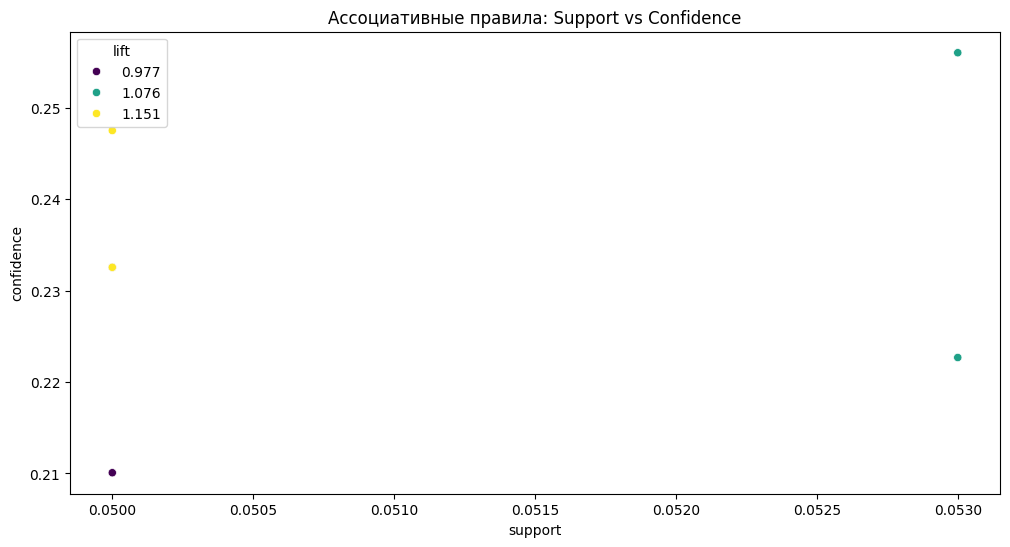


Топ-5 правил по лифту (lift):
  antecedents consequents  support  confidence   lift
4   (Шоколад)     (Сахар)    0.050    0.247525  1.151
5     (Сахар)   (Шоколад)    0.050    0.232558  1.151
1      (Вода)   (Печенье)    0.053    0.222689  1.076
0   (Печенье)      (Вода)    0.053    0.256039  1.076
3     (Сахар)      (Вода)    0.050    0.232558  0.977

Топ-5 правил по убежденности (conviction):
  antecedents consequents  antecedent support  consequent support  confidence  \
4   (Шоколад)     (Сахар)               0.202               0.215    0.247525   
5     (Сахар)   (Шоколад)               0.215               0.202    0.232558   
1      (Вода)   (Печенье)               0.238               0.207    0.222689   
0   (Печенье)      (Вода)               0.207               0.238    0.256039   
3     (Сахар)      (Вода)               0.215               0.238    0.232558   

   conviction  
4        1.04  
5        1.04  
1        1.02  
0        1.02  
3        0.99  


'\nМетрики ассоциативных правил:\n1. Support (Поддержка) - P(A ∩ B) - как часто встречается набор\n   Пример: support=0.1 означает, что набор встречается в 10% транзакций\n\n2. Confidence (Доверие) - P(B|A) - вероятность купить B при покупке A\n   Пример: confidence=0.7 означает 70% вероятность\n\n3. Lift (Лифт) - P(A ∩ B)/(P(A)*P(B)) - насколько чаще встречается A и B вместе\n   Lift > 1: положительная корреляция\n   Lift = 1: независимость\n   Lift < 1: отрицательная корреляция\n\n4. Leverage (Рычаг) - P(A ∩ B) - P(A)*P(B) - разница от ожидаемой частоты\n   Leverage > 0: чаще, чем ожидалось\n   Leverage = 0: как ожидалось\n   Leverage < 0: реже, чем ожидалось\n\n5. Conviction (Убежденность) - (1 - P(B))/(1 - P(B|A)) - насколько правило ошибается\n   Conviction > 1: правило полезно\n   Conviction = 1: нейтрально\n   Conviction < 1: правило хуже случайного\n'

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Генерация синтетического dataset
np.random.seed(42)

# Список товаров
products = [
    "Хлеб", "Молоко", "Яйца", "Сыр", "Кофе",
    "Чай", "Сахар", "Масло", "Яблоки", "Бананы",
    "Мясо", "Рыба", "Печенье", "Шоколад", "Вода"
]

# Генерация 1000 транзакций
transactions = []
for _ in range(1000):
    num_items = np.random.randint(1, 6)  # От 1 до 5 товаров в покупке
    items = np.random.choice(products, num_items, replace=False)
    transactions.append(list(items))

# Создаем DataFrame
df = pd.DataFrame({"Транзакция": transactions})
print(f"Всего транзакций: {len(df)}")
print("\nПримеры транзакций:")
print(df.head())

## 2. Преобразование данных для анализа
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("\nЗакодированный DataFrame (первые 5 строк):")
print(df_encoded.head())

## 3. Поиск частых наборов товаров (itemsets)
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print("\nЧастые наборы товаров:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

## 4. Генерация ассоциативных правил
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Добавляем дополнительные метрики
rules['lift'] = rules['lift'].round(3)
rules['leverage'] = rules['leverage'].round(4)
rules['conviction'] = rules['conviction'].round(2)

print("\nСгенерированные ассоциативные правила:")
pd.set_option('display.max_columns', None)
print(rules.sort_values(by='lift', ascending=False).head())

## 5. Визуализация результатов
plt.figure(figsize=(12, 6))

# График поддержки (support) vs доверия (confidence)
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', palette='viridis')
plt.title('Ассоциативные правила: Support vs Confidence')
plt.show()

## 6. Анализ наиболее интересных правил
print("\nТоп-5 правил по лифту (lift):")
top_rules = rules.sort_values(by='lift', ascending=False).head(5)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nТоп-5 правил по убежденности (conviction):")
top_conviction = rules.sort_values(by='conviction', ascending=False).head(5)
print(top_conviction[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'confidence', 'conviction']])

## 7. Интерпретация метрик
"""
Метрики ассоциативных правил:
1. Support (Поддержка) - P(A ∩ B) - как часто встречается набор
   Пример: support=0.1 означает, что набор встречается в 10% транзакций

2. Confidence (Доверие) - P(B|A) - вероятность купить B при покупке A
   Пример: confidence=0.7 означает 70% вероятность

3. Lift (Лифт) - P(A ∩ B)/(P(A)*P(B)) - насколько чаще встречается A и B вместе
   Lift > 1: положительная корреляция
   Lift = 1: независимость
   Lift < 1: отрицательная корреляция

4. Leverage (Рычаг) - P(A ∩ B) - P(A)*P(B) - разница от ожидаемой частоты
   Leverage > 0: чаще, чем ожидалось
   Leverage = 0: как ожидалось
   Leverage < 0: реже, чем ожидалось

5. Conviction (Убежденность) - (1 - P(B))/(1 - P(B|A)) - насколько правило ошибается
   Conviction > 1: правило полезно
   Conviction = 1: нейтрально
   Conviction < 1: правило хуже случайного
"""

Кластеризация K-Means

1 Кластеров -  12857.125822355985
2 Кластеров -  8505.105404308095
3 Кластеров -  2162.838865400953
4 Кластеров -  1206.7073722309046
5 Кластеров -  861.5140343449963
6 Кластеров -  687.5782262868224
7 Кластеров -  569.7243052244465
8 Кластеров -  419.7941087882938
9 Кластеров -  393.267816413297
10 Кластеров -  368.11973817649994


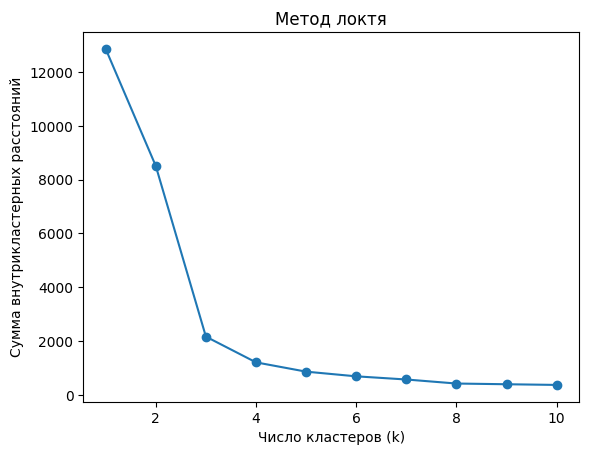

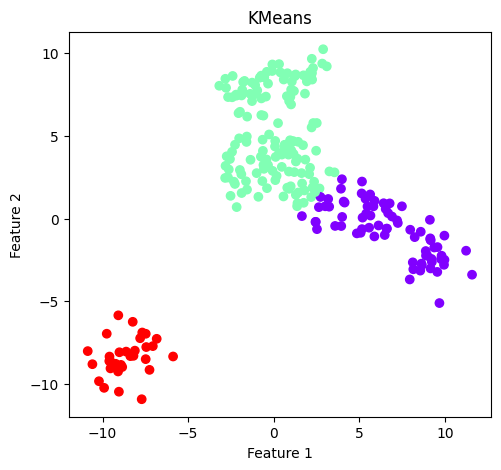

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

class KMeansClustering:
    def __init__(self, n_clusters=8, max_iter=300, tol=0.0001, random_state=0, cluster_centers_ = 0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.cluster_centers_ = cluster_centers_

    def _greedy_kmeans_plus_plus(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        n_local_trials = 2 + int(np.log(self.n_clusters))

        indices = np.arange(n_samples)
        first_index = np.random.choice(indices)
        centers = np.zeros((self.n_clusters, n_features))

        centers[0] = X[first_index]
        first_center = centers[0].reshape(1, -1)
        sq_distances = cdist(X, first_center, metric='sqeuclidean').ravel()

        for i in range(1, self.n_clusters):
            min_cost = np.inf
            min_new_sq_distances = []
            best_candidate_index = None

            for _ in range(n_local_trials):
                candidates_probas = sq_distances / np.sum(sq_distances)
                candidate_index = np.random.choice(indices, p=candidates_probas)
                candidate = X[candidate_index].reshape(1, -1)

                new_sq_distances = cdist(X, candidate, metric='sqeuclidean').ravel()
                new_cost = np.sum(np.minimum(sq_distances, new_sq_distances))

                if new_cost < min_cost:
                    best_candidate_index = candidate_index
                    min_new_sq_distances = new_sq_distances
                    min_cost = new_cost

            centers[i] = X[best_candidate_index]
            sq_distances = np.minimum(sq_distances, min_new_sq_distances)

        return centers

    def fit(self, X):
        n_samples, n_features = X.shape
        self.inertia_ = np.inf
        self.cluster_centers_ = self._greedy_kmeans_plus_plus(X)

        for _ in range(self.max_iter):
            distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
            labels = np.argmin(distances, axis=1)
            new_inertia = np.sum(np.min(distances, axis=1))
            new_centers = np.zeros((self.n_clusters, n_features))

            for k in range(self.n_clusters):
                new_centers[k] = np.mean(X[labels == k], axis=0)

            if np.abs(new_inertia - self.inertia_) < self.tol:
                break

            self.inertia_ = new_inertia
            self.cluster_centers_ = new_centers

    def predict(self, X):
        distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
        predicted_labels = np.argmin(distances, axis=1)

        return predicted_labels

X1, y1 = make_blobs(n_samples=250, n_features=2, centers=8, random_state=0)

inertias = []
for i in range(1, 11):
  kmeans = KMeansClustering(n_clusters=i)
  kmeans.fit(X1)
  inertias.append(kmeans.inertia_)

for a in inertias:
  print(inertias.index(a)+1,"Кластеров - ", a)

cluster1 = KMeansClustering(n_clusters=3)
cluster1.fit(X1)
kmeans_pred_res = cluster1.predict(X1)
kmeans_centroids = cluster1._greedy_kmeans_plus_plus(X1)

plt.plot(range(1,10), inertias, marker="o")
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()



plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_pred_res, cmap="rainbow")
plt.title("KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Кластеризация STING

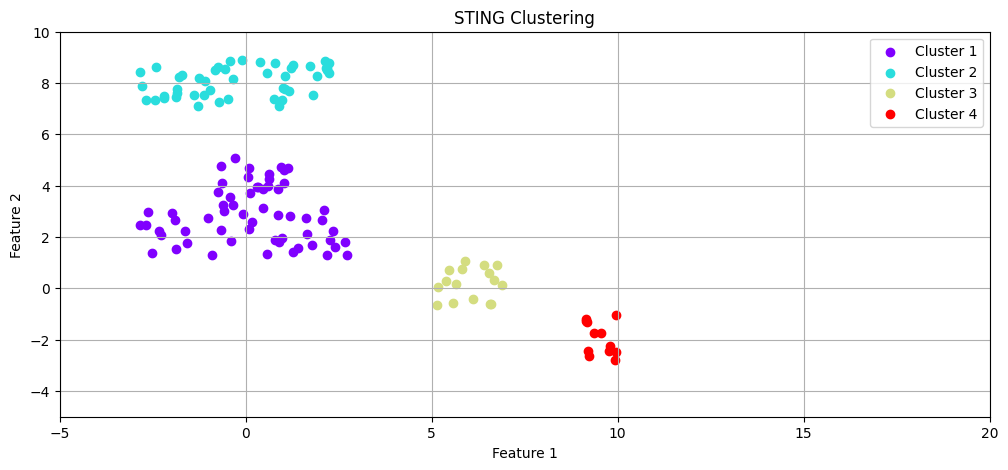

Dunn Index: 0.3911


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import pandas as pd

class STINGClustering:
    def __init__(self, grid_size=0.5, density_threshold=5):
        self.grid_size = grid_size  # размер ячейки сетки
        self.density_threshold = density_threshold  # порог плотности для кластера
        self.grid_stats = {}  # статистика по ячейкам
        self.clusters = []  # найденные кластеры

    def _build_grid(self, X):
        min_vals = np.min(X, axis=0)
        max_vals = np.max(X, axis=0)

        # сетка
        x_bins = np.arange(min_vals[0], max_vals[0] + self.grid_size, self.grid_size)
        y_bins = np.arange(min_vals[1], max_vals[1] + self.grid_size, self.grid_size)

        # точки в ячейках
        for i in range(len(x_bins) - 1):
            for j in range(len(y_bins) - 1):
                x_mask = (X[:, 0] >= x_bins[i]) & (X[:, 0] < x_bins[i + 1])
                y_mask = (X[:, 1] >= y_bins[j]) & (X[:, 1] < y_bins[j + 1])
                points_in_cell = X[x_mask & y_mask]

                # статистика (кол-во точек, среднее, дисперсию)
                if len(points_in_cell) > 0:
                    key = (i, j)
                    self.grid_stats[key] = {
                        "count": len(points_in_cell),
                        "mean": np.mean(points_in_cell, axis=0),
                        "points": points_in_cell
                    }

    def _find_clusters(self):
        visited = set()
        for cell in self.grid_stats:
            if cell not in visited and self.grid_stats[cell]["count"] >= self.density_threshold:
                cluster = []
                stack = [cell]
                while stack:
                    current_cell = stack.pop()
                    if current_cell not in visited:
                        visited.add(current_cell)
                        cluster.extend(self.grid_stats[current_cell]["points"].tolist())

                        # проверяем соседние ячейки (8-связность)
                        i, j = current_cell
                        for di in [-1, 0, 1]:
                            for dj in [-1, 0, 1]:
                                neighbor = (i + di, j + dj)
                                if neighbor in self.grid_stats and neighbor not in visited:
                                    if self.grid_stats[neighbor]["count"] >= self.density_threshold:
                                        stack.append(neighbor)
                if cluster:
                    self.clusters.append(np.array(cluster))

    def fit(self, X):
        self._build_grid(X)
        self._find_clusters()
        return self

    def get_clusters(self):
        return self.clusters

    def compute_dunn_index(self):
        if len(self.clusters) < 2:
            return 0.0

        # 1. Вычисляем минимальное межкластерное расстояние
        min_intercluster_dist = np.inf
        for i in range(len(self.clusters)):
            for j in range(i + 1, len(self.clusters)):
                dist_matrix = cdist(self.clusters[i], self.clusters[j])
                min_dist = np.min(dist_matrix)
                if min_dist < min_intercluster_dist:
                    min_intercluster_dist = min_dist

        # 2. Вычисляем максимальный диаметр кластера
        max_diameter = 0.0
        for cluster in self.clusters:
            if len(cluster) >= 2:  # Диаметр требует хотя бы 2 точки
                dist_matrix = cdist(cluster, cluster)
                diameter = np.max(dist_matrix)
                if diameter > max_diameter:
                    max_diameter = diameter

        # 3. Индекс Данна
        dunn_index = min_intercluster_dist / max_diameter if max_diameter != 0 else 0.0
        return dunn_index

# Пример использования
X, _ = make_blobs(n_samples=250, n_features=2, centers=8, random_state=0)

sting = STINGClustering(grid_size=2, density_threshold=10)
sting.fit(X)
clusters = sting.get_clusters()

# Визуализация
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()
colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))
for i, cluster in enumerate(clusters):
    ax.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f"Cluster {i+1}")
    ax.set(xlim=(-5, 20), ylim=(-5, 10))
plt.title("STING Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

dunn_index = sting.compute_dunn_index()
print(f"Dunn Index: {dunn_index:.4f}")

1 Кластеров -  171535.5
2 Кластеров -  75949.15601023017
3 Кластеров -  45844.53681626928
4 Кластеров -  28165.583566629342
5 Кластеров -  24006.62379112116
6 Кластеров -  19848.77022260893
7 Кластеров -  17787.891327852256
8 Кластеров -  13126.707755207757
9 Кластеров -  11803.633077640367
10 Кластеров -  10411.056481360829


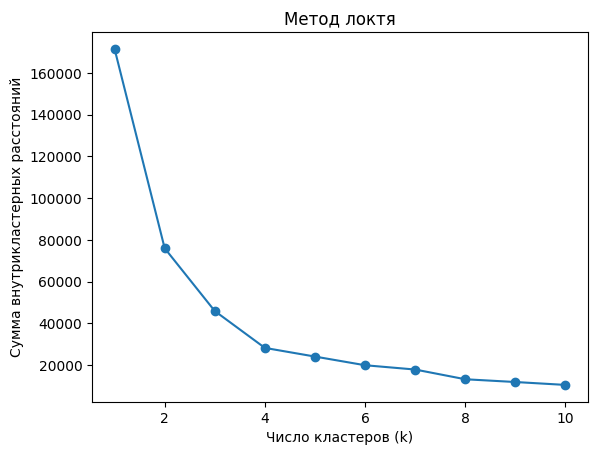

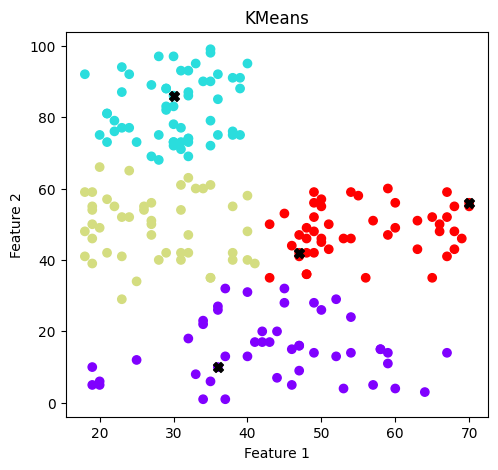

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

class KMeansClustering:
    def __init__(self, n_clusters=8, max_iter=300, tol=0.001, random_state=0, cluster_centers_ = 0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.cluster_centers_ = cluster_centers_

    def _greedy_kmeans_plus_plus(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        n_local_trials = 2 + int(np.log(self.n_clusters))

        indices = np.arange(n_samples)
        first_index = np.random.choice(indices)
        centers = np.zeros((self.n_clusters, n_features))

        centers[0] = X[first_index]
        first_center = centers[0].reshape(1, -1)
        sq_distances = cdist(X, first_center, metric='sqeuclidean').ravel()

        for i in range(1, self.n_clusters):
            min_cost = np.inf
            min_new_sq_distances = []
            best_candidate_index = None

            for _ in range(n_local_trials):
                candidates_probas = sq_distances / np.sum(sq_distances)
                candidate_index = np.random.choice(indices, p=candidates_probas)
                candidate = X[candidate_index].reshape(1, -1)

                new_sq_distances = cdist(X, candidate, metric='sqeuclidean').ravel()
                new_cost = np.sum(np.minimum(sq_distances, new_sq_distances))

                if new_cost < min_cost:
                    best_candidate_index = candidate_index
                    min_new_sq_distances = new_sq_distances
                    min_cost = new_cost

            centers[i] = X[best_candidate_index]   # Choose the new center
            sq_distances = np.minimum(sq_distances, min_new_sq_distances)

        return centers

    def fit(self, X):
        n_samples, n_features = X.shape
        self.inertia_ = np.inf
        self.cluster_centers_ = self._greedy_kmeans_plus_plus(X)

        for _ in range(self.max_iter):
            distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
            labels = np.argmin(distances, axis=1)
            new_inertia = np.sum(np.min(distances, axis=1))
            new_centers = np.zeros((self.n_clusters, n_features))

            for k in range(self.n_clusters):
                new_centers[k] = np.mean(X[labels == k], axis=0)

            if np.abs(new_inertia - self.inertia_) < self.tol:
                break

            self.inertia_ = new_inertia
            self.cluster_centers_ = new_centers

    def predict(self, X):
        distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
        predicted_labels = np.argmin(distances, axis=1)

        return predicted_labels

f_data = pd.read_csv('Mall_Customers.csv')
ages = list(f_data["Age"])
spend_scores = list(f_data["Spending Score (1-100)"])
X1 = np.array([[ages[i],spend_scores[i]] for i in range(len(ages))])

inertias = []
for i in range(1, 11):
  kmeans = KMeansClustering(n_clusters=i)
  kmeans.fit(X1)
  inertias.append(kmeans.inertia_)

for a in inertias:
  print(inertias.index(a)+1,"Кластеров - ", a)

cluster1 = KMeansClustering(n_clusters=4)
cluster1.fit(X1)
kmeans_pred_res = cluster1.predict(X1)
kmeans_centroids = cluster1._greedy_kmeans_plus_plus(X1)

plt.plot(range(1,11), inertias, marker="o")
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_pred_res, cmap="rainbow")
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='black', s=50, marker='X', label='Центры кластеров')
plt.title("KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

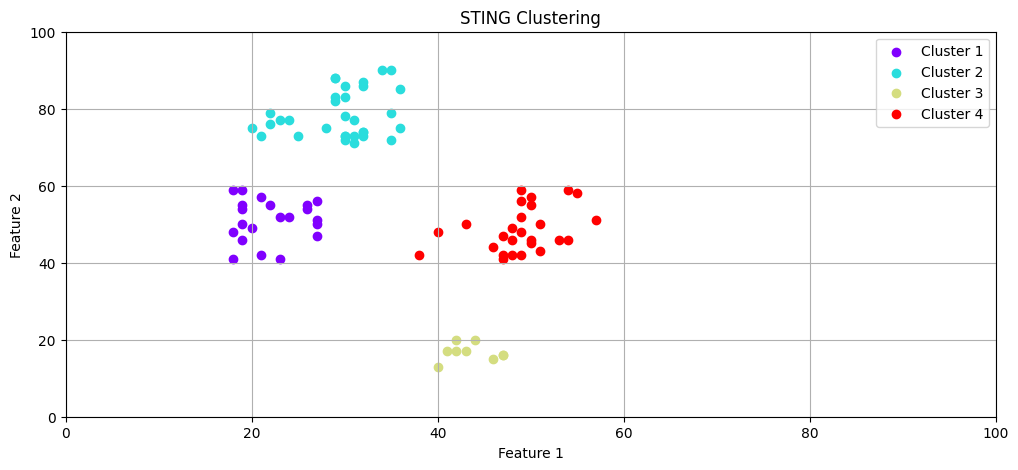

Индекс Данна: 0.5175808229222569


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import pandas as pd

class STINGClustering:
    def __init__(self, grid_size, density_threshold):
        self.grid_size = grid_size
        self.density_threshold = density_threshold
        self.grid_stats = {}
        self.clusters = []

    def _build_grid(self, X):
        min_vals = np.min(X, axis=0)
        max_vals = np.max(X, axis=0)

        x_bins = np.arange(min_vals[0], max_vals[0], self.grid_size)
        y_bins = np.arange(min_vals[1], max_vals[1], self.grid_size)

        for i in range(len(x_bins) - 1):
            for j in range(len(y_bins) - 1):
                x_mask = (X[:, 0] >= x_bins[i]) & (X[:, 0] < x_bins[i + 1])
                y_mask = (X[:, 1] >= y_bins[j]) & (X[:, 1] < y_bins[j + 1])
                points_in_cell = X[x_mask & y_mask]

                if len(points_in_cell) > 0:
                    key = (i, j)
                    self.grid_stats[key] = {
                        "count": len(points_in_cell),
                        "mean": np.mean(points_in_cell, axis=0),
                        "points": points_in_cell
                    }

    def _find_clusters(self):
        visited = set()
        for cell in self.grid_stats:
            if cell not in visited and self.grid_stats[cell]["count"] >= self.density_threshold:
                cluster = []
                stack = [cell]
                while stack:
                    current_cell = stack.pop()
                    if current_cell not in visited:
                        visited.add(current_cell)
                        cluster.extend(self.grid_stats[current_cell]["points"].tolist())

                        i, j = current_cell
                        for di in [-1, 0, 1]:
                            for dj in [-1, 0, 1]:
                                neighbor = (i + di, j + dj)
                                if neighbor in self.grid_stats and neighbor not in visited:
                                    if self.grid_stats[neighbor]["count"] >= self.density_threshold:
                                        stack.append(neighbor)
                if cluster:
                    self.clusters.append(np.array(cluster))

    def fit(self, X):
        self._build_grid(X)
        self._find_clusters()
        return self

    def get_clusters(self):
        return self.clusters

    def dunn_index(self):
        if len(self.clusters) < 2:
            return 0.0

        min_intercluster_dist = np.inf
        for i in range(len(self.clusters)):
            for j in range(i + 1, len(self.clusters)):
                dist_matrix = cdist(self.clusters[i], self.clusters[j])
                min_dist = np.min(dist_matrix)
                if min_dist < min_intercluster_dist:
                    min_intercluster_dist = min_dist

        max_diameter = 0.0
        for cluster in self.clusters:
            if len(cluster) >= 2:
                dist_matrix = cdist(cluster, cluster)
                diameter = np.max(dist_matrix)
                if diameter > max_diameter:
                    max_diameter = diameter

        dunn_index = min_intercluster_dist / max_diameter if max_diameter != 0 else 0.0
        return dunn_index

f_data = pd.read_csv('Mall_Customers.csv')
ages = list(f_data["Age"])
spend_scores = list(f_data["Spending Score (1-100)"])
X = np.array([[ages[i],spend_scores[i]] for i in range(len(ages))])

sting = STINGClustering(grid_size=10, density_threshold=7)
sting.fit(X)
clusters = sting.get_clusters()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot()
colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))
for i, cluster in enumerate(clusters):
    ax.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f"Cluster {i+1}")
    ax.set(xlim=(0, 100), ylim=(0, 100))
plt.title("STING Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

print(f'Индекс Данна: {sting.dunn_index()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

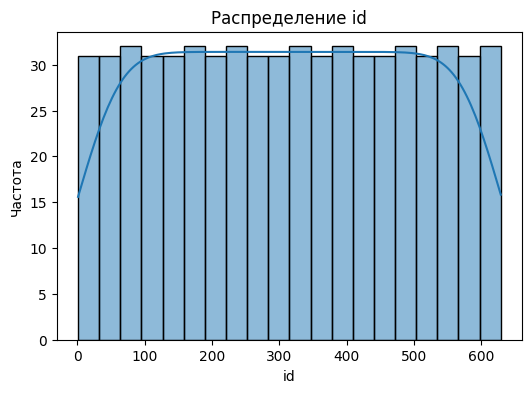

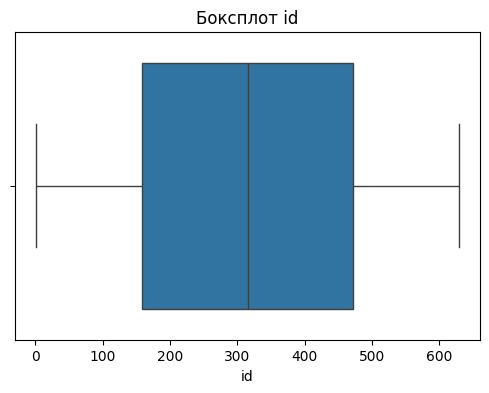

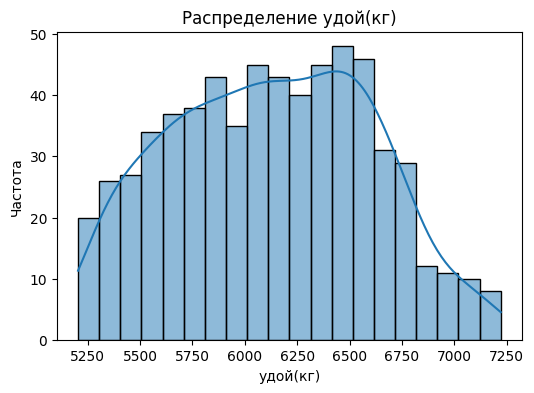

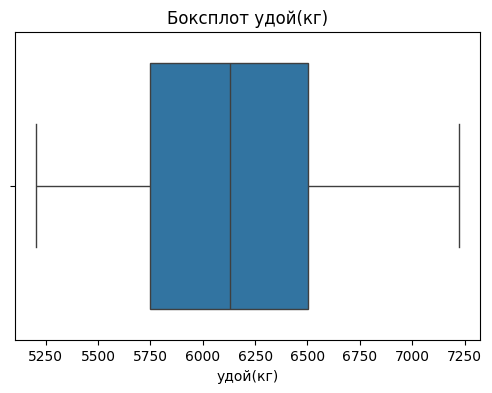

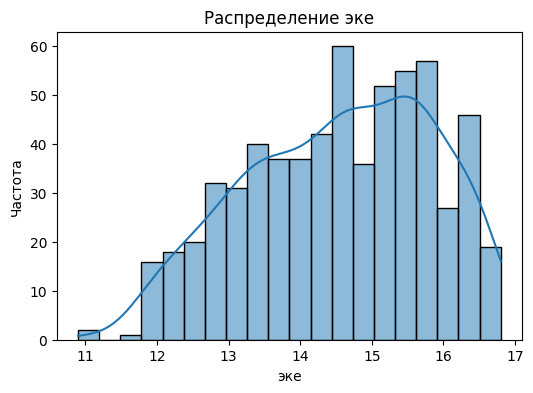

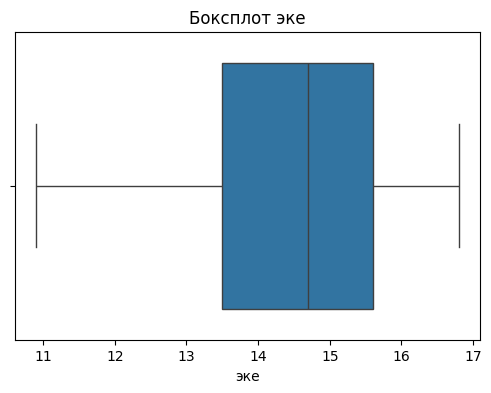

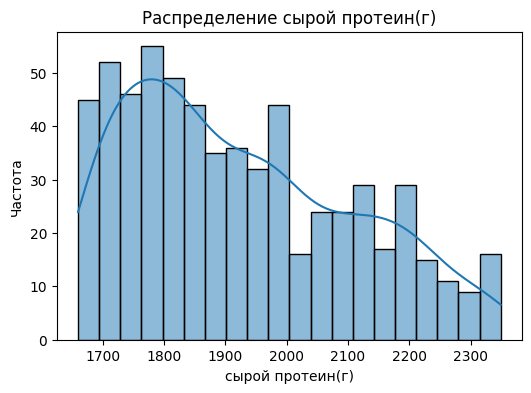

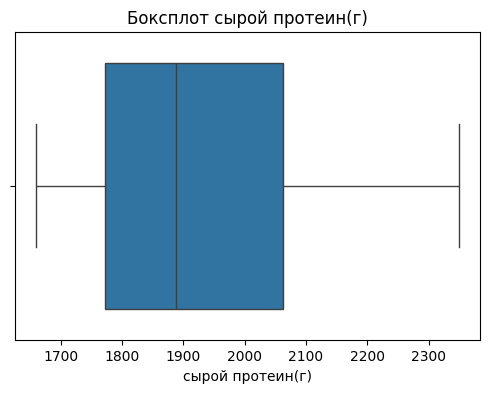

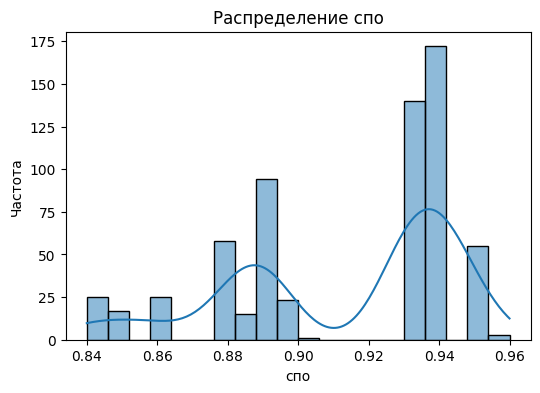

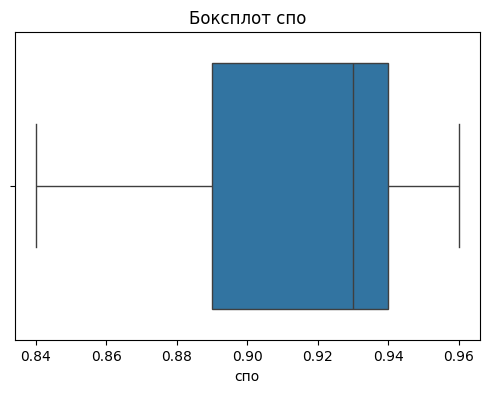

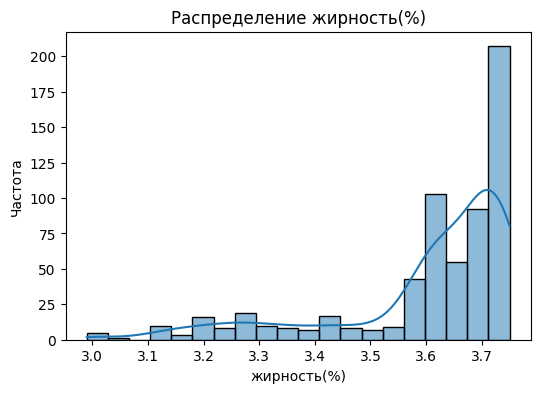

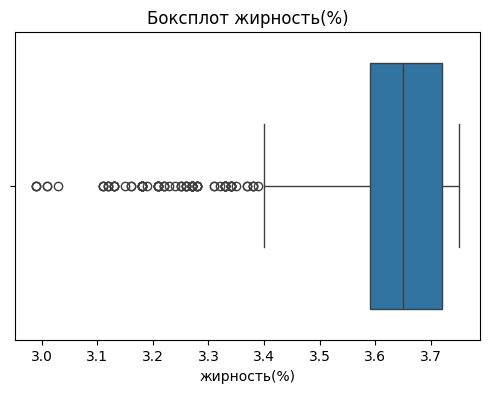

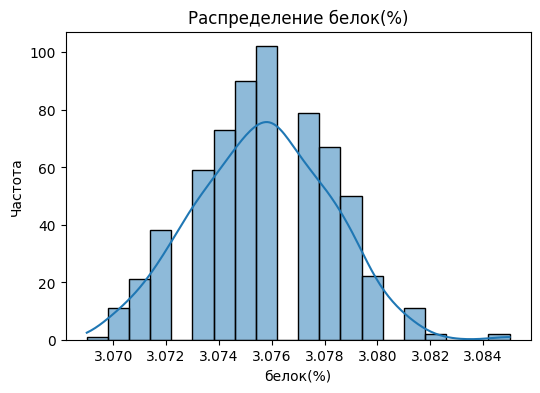

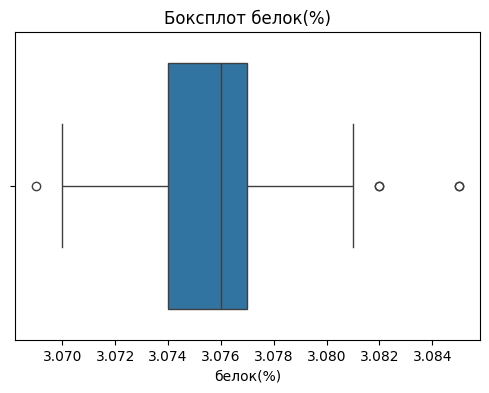

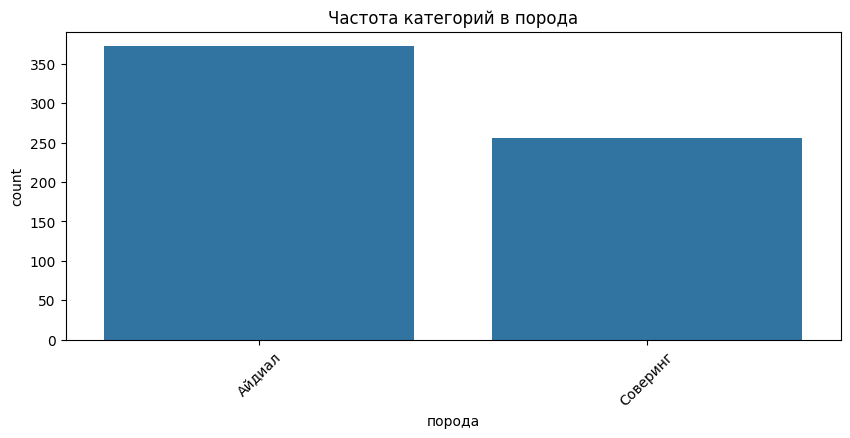

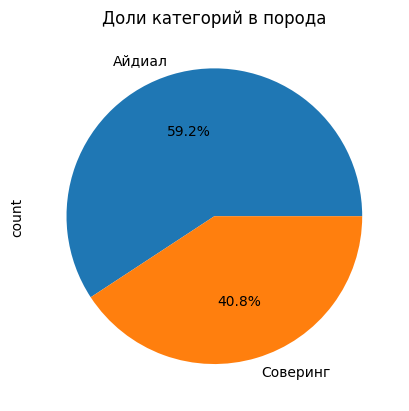

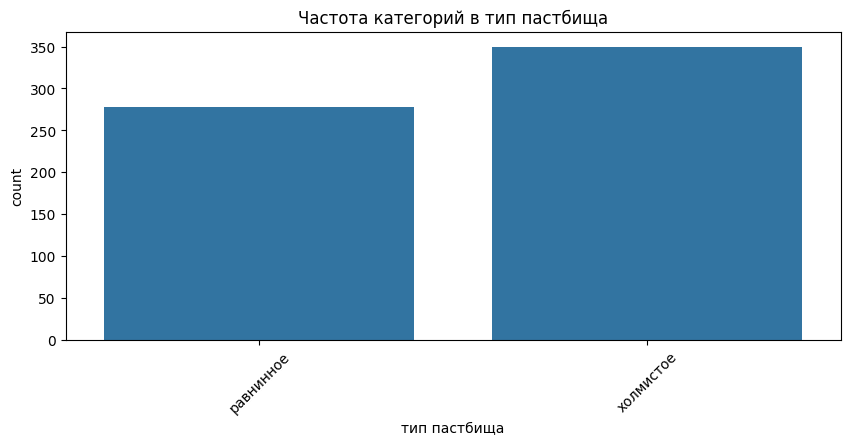

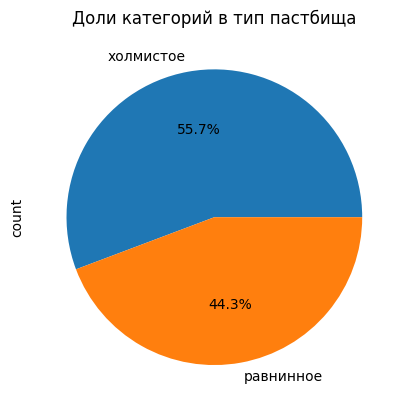

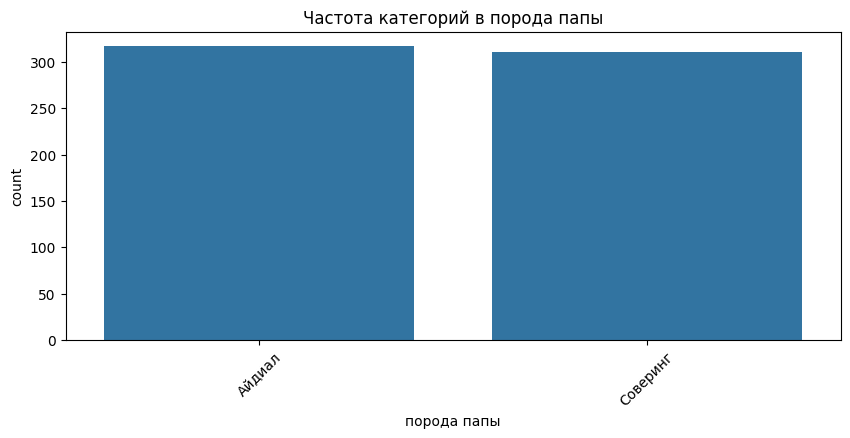

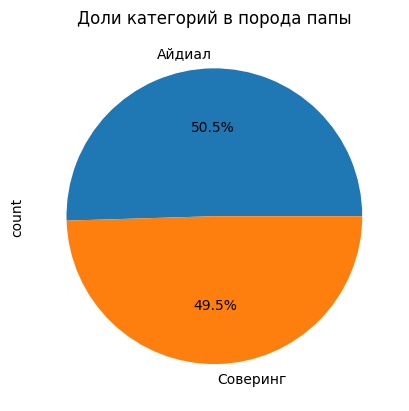

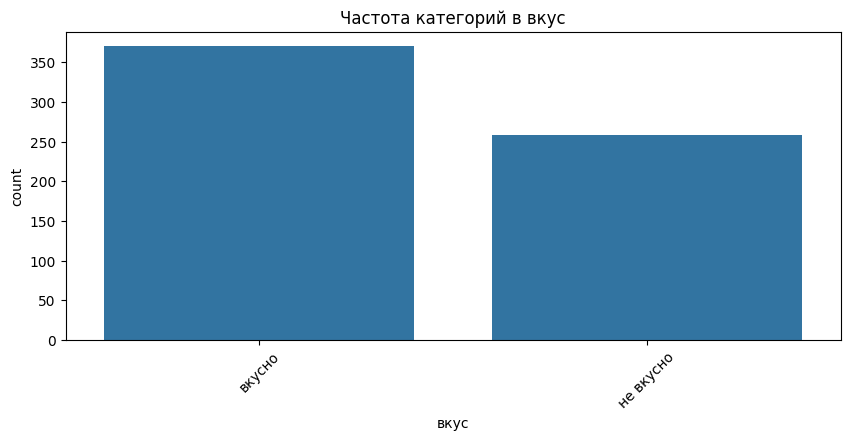

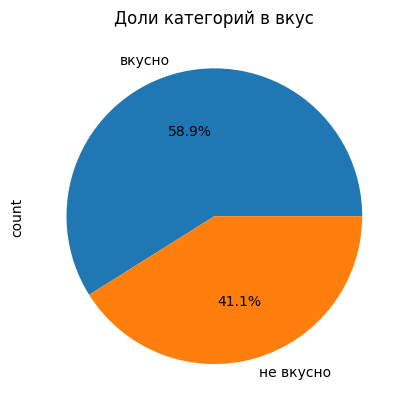

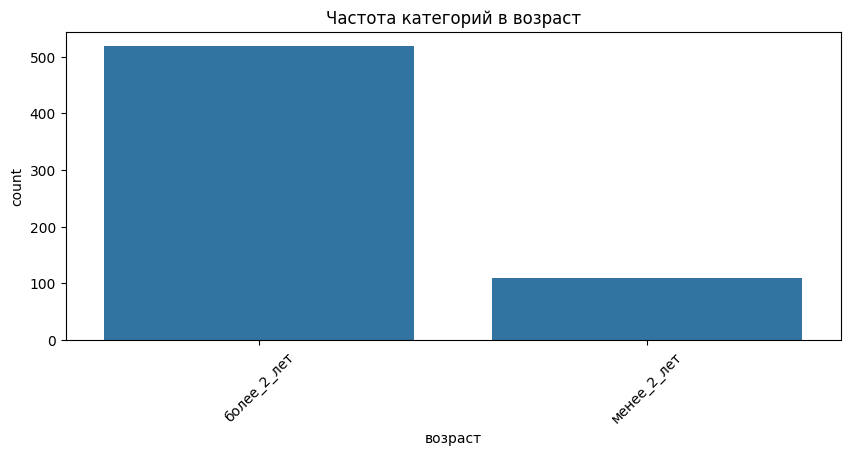

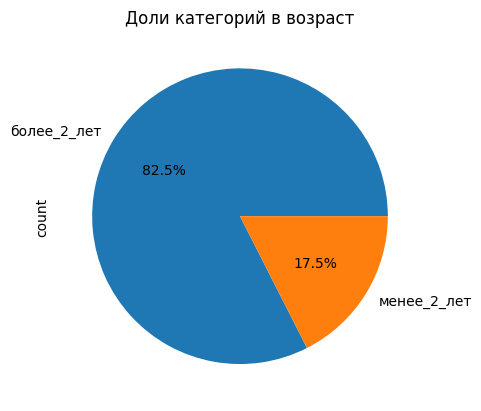

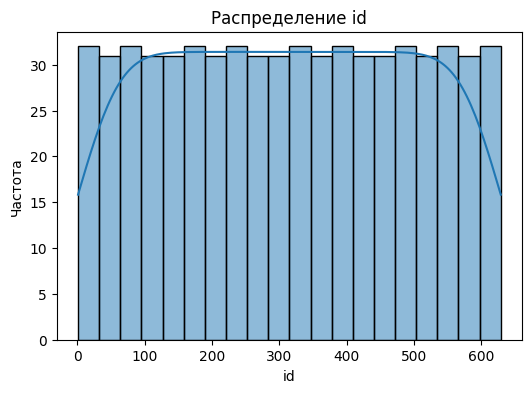

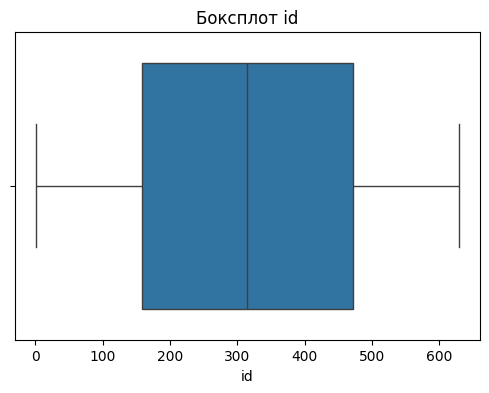

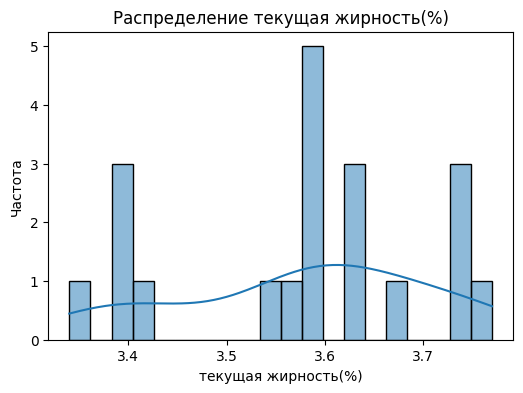

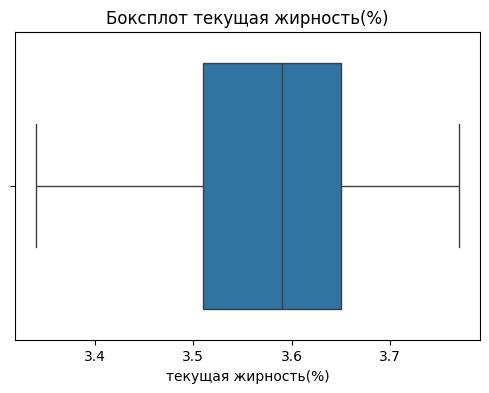

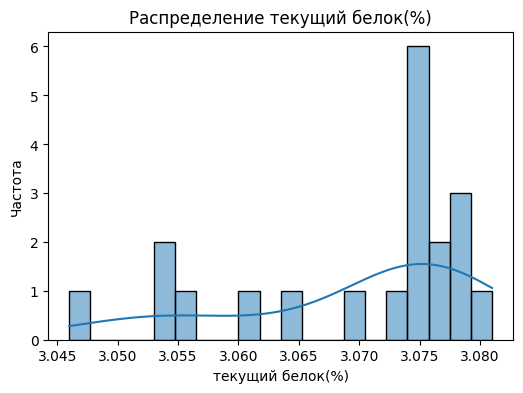

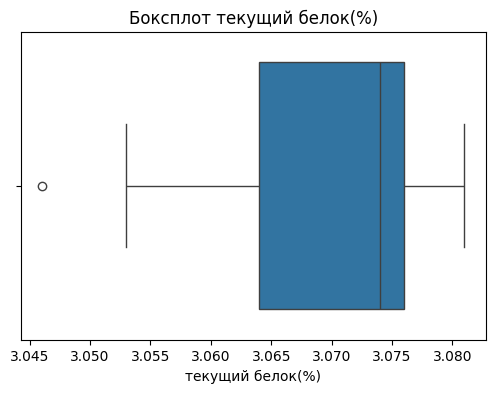

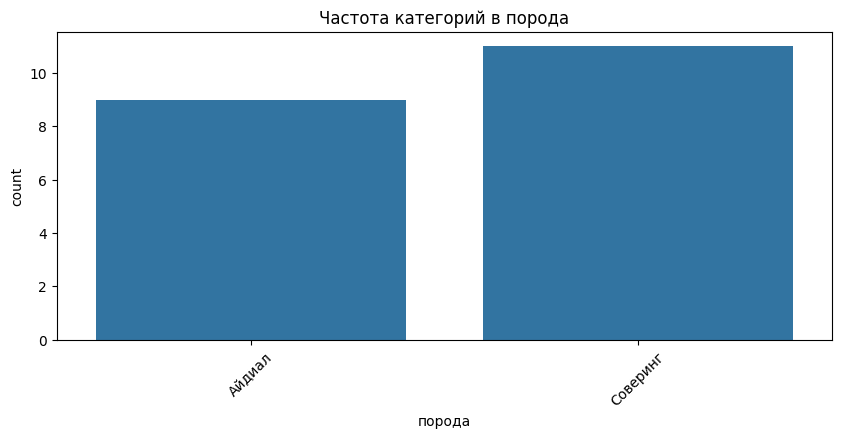

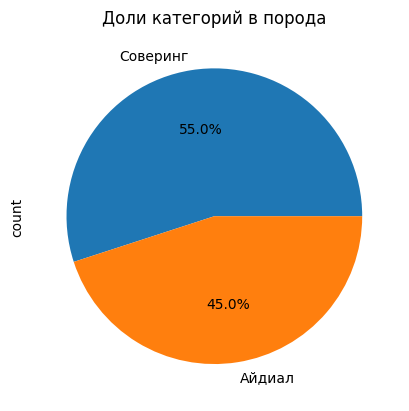

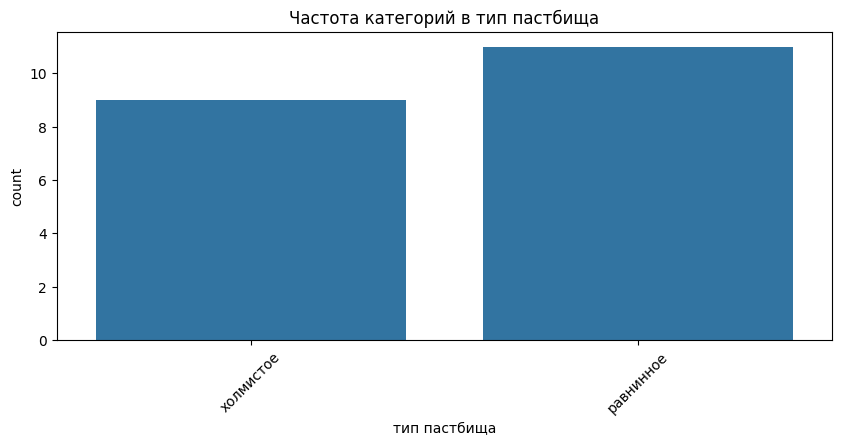

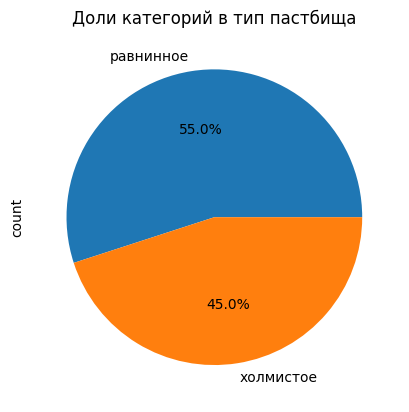

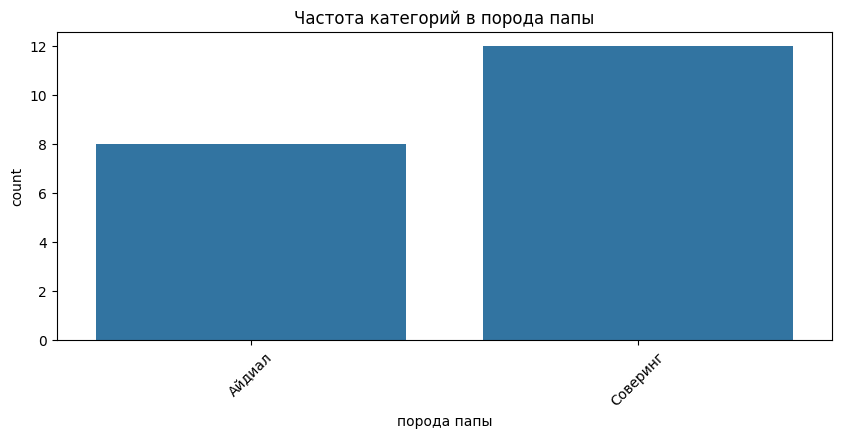

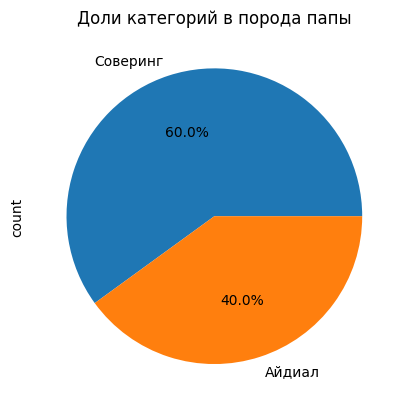

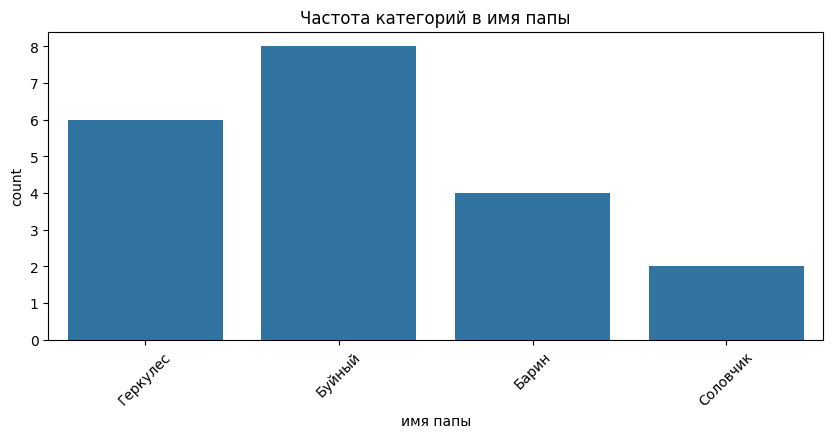

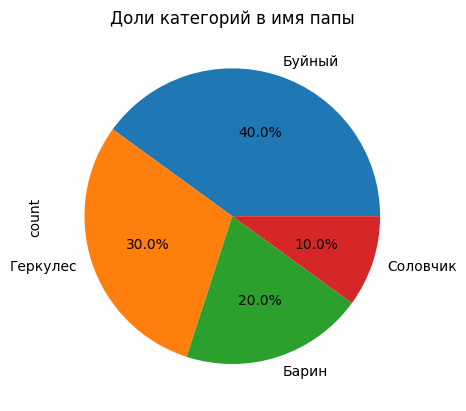

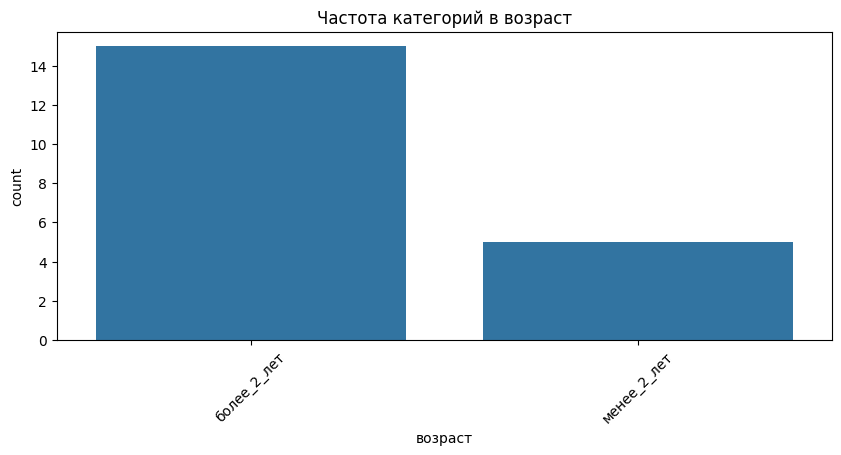

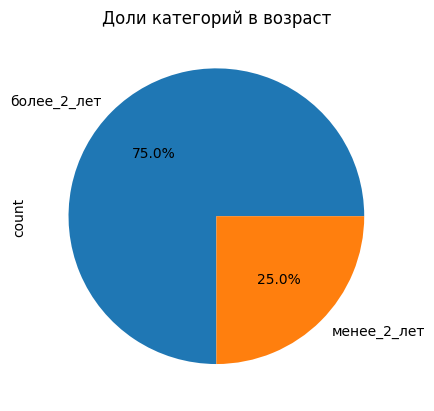

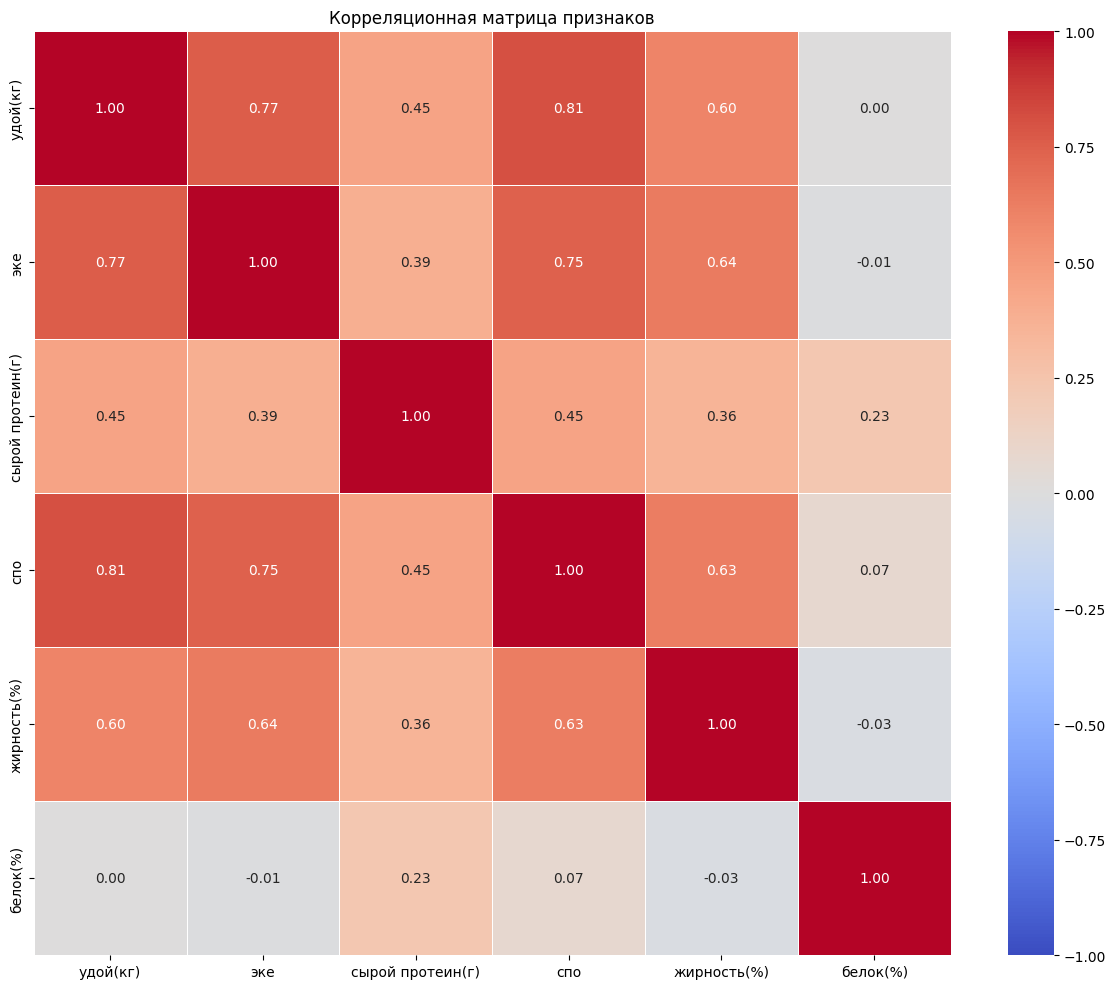

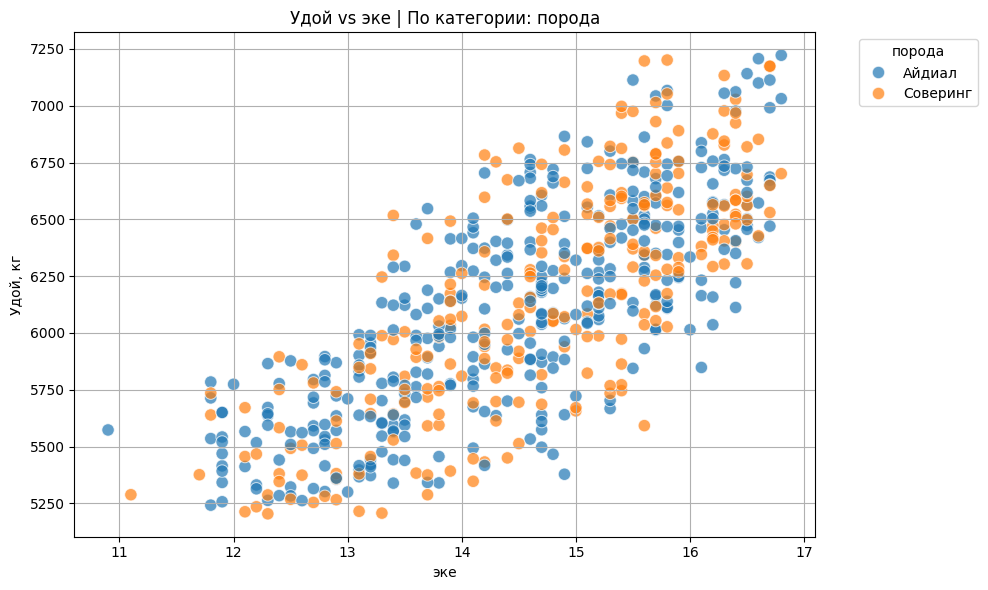

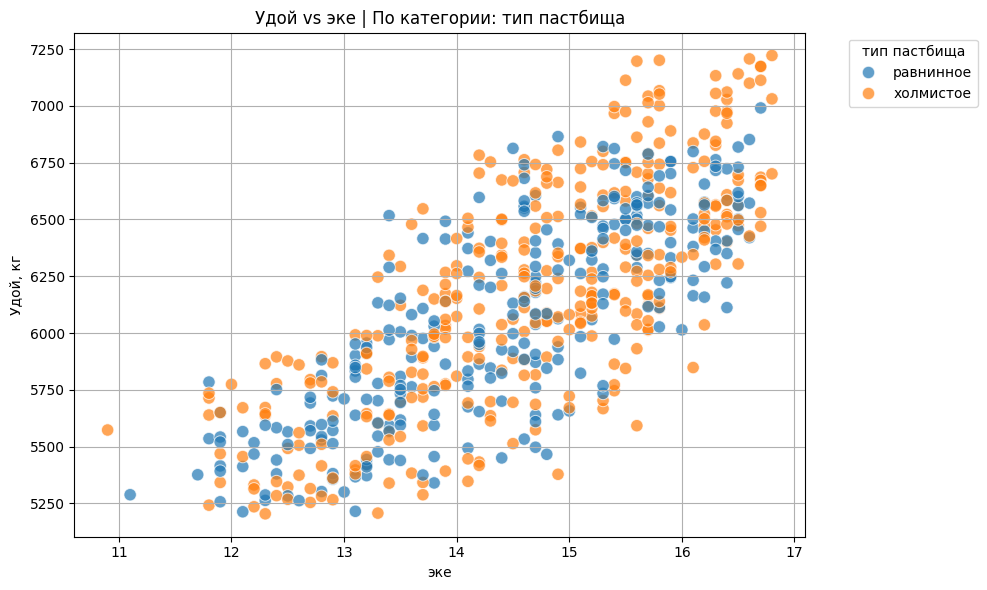

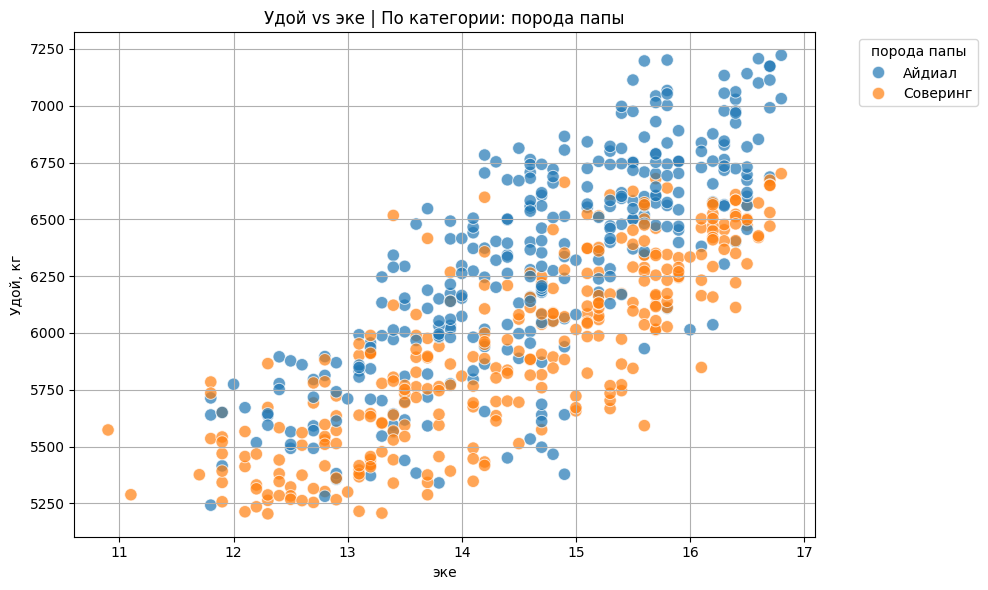

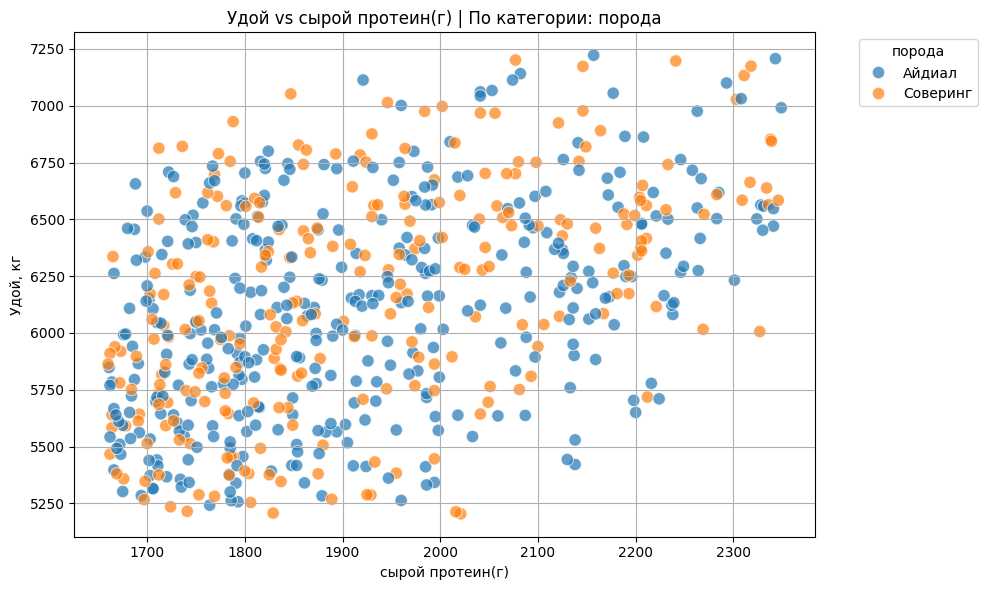

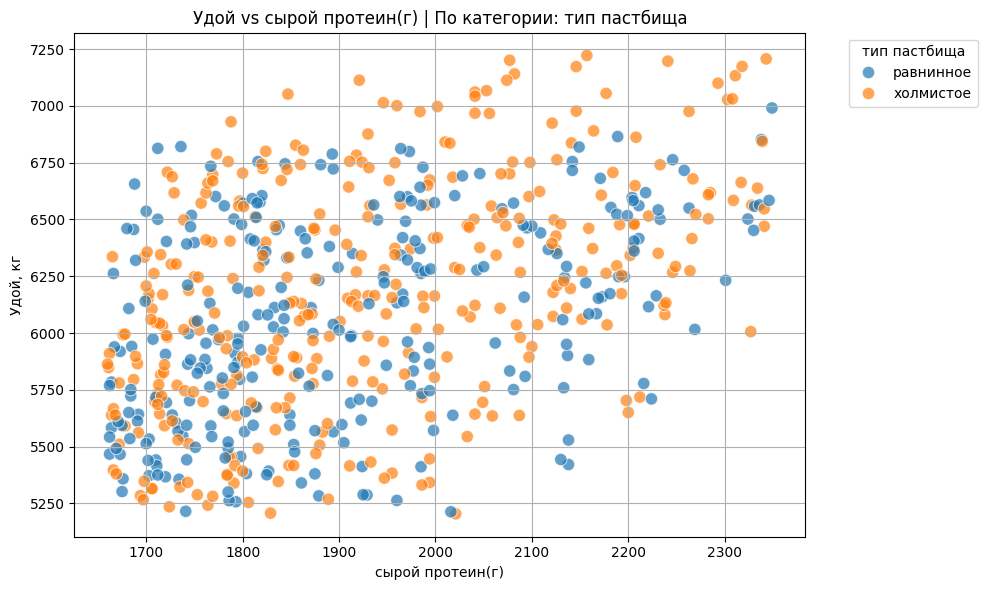

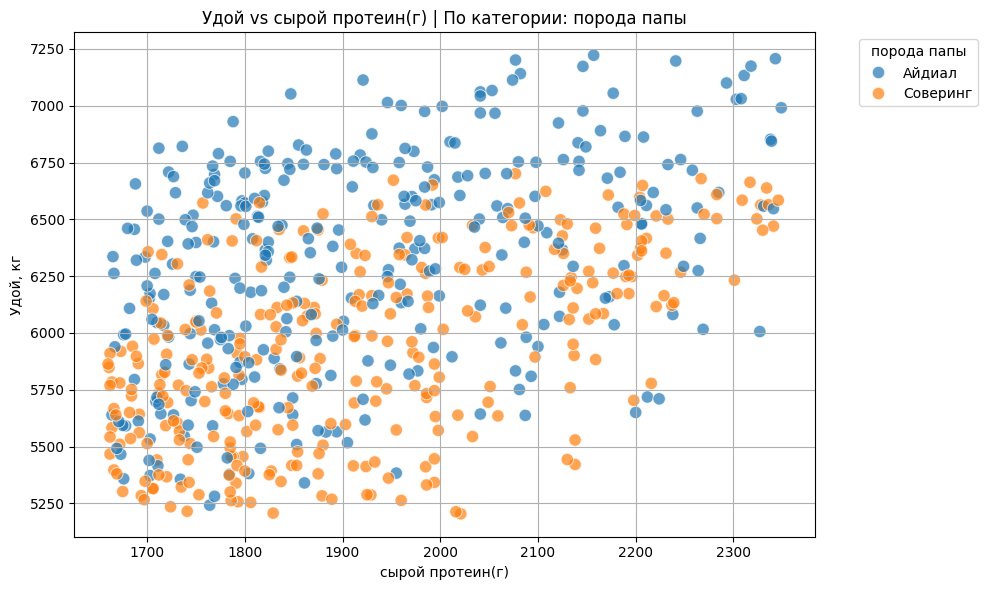

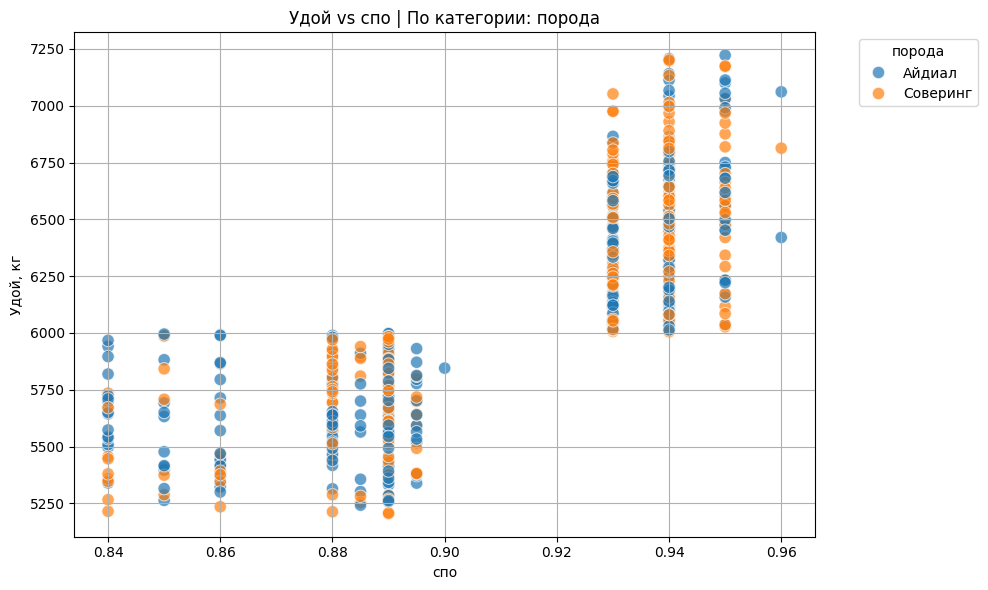

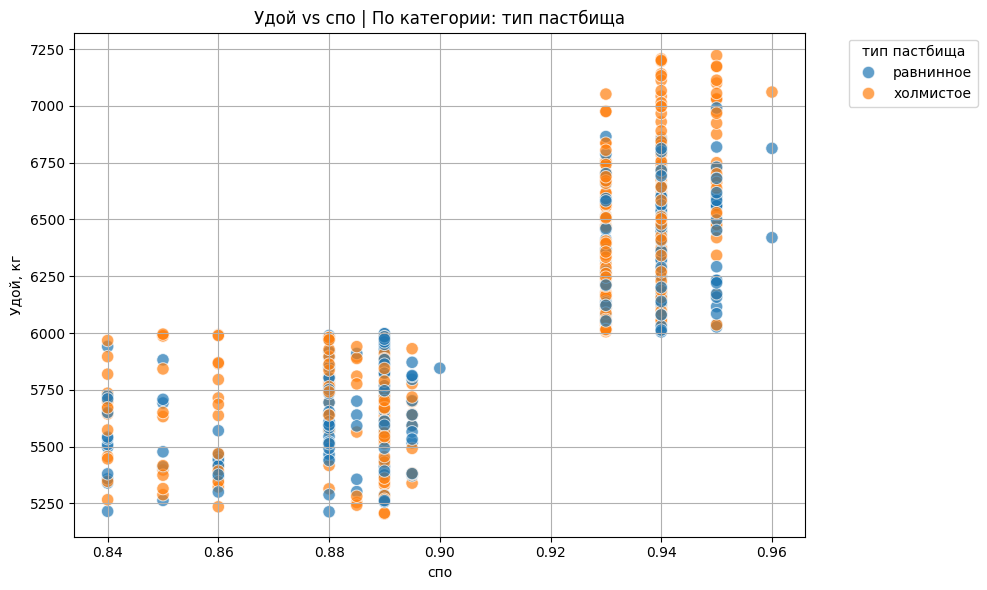

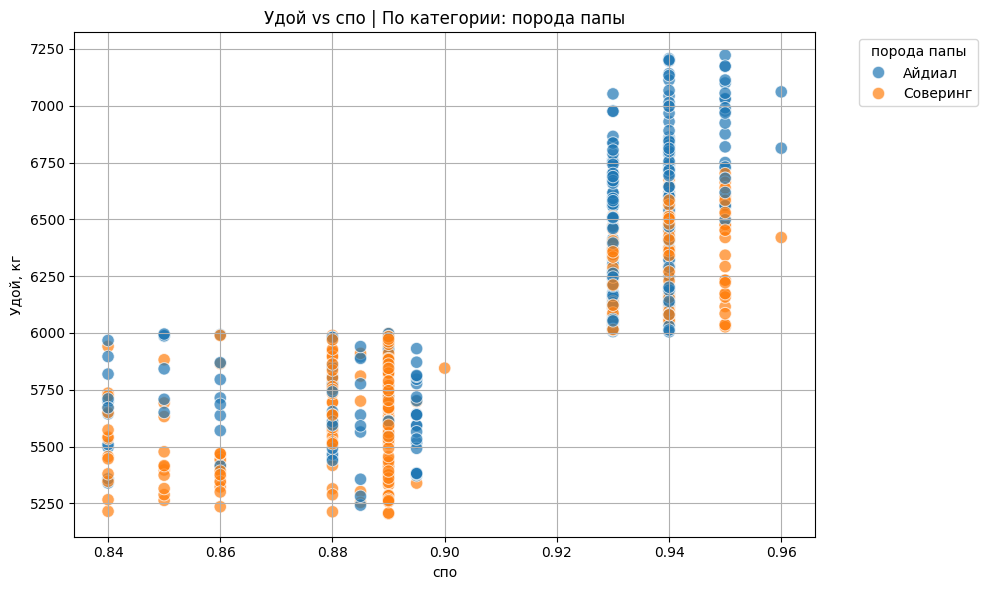

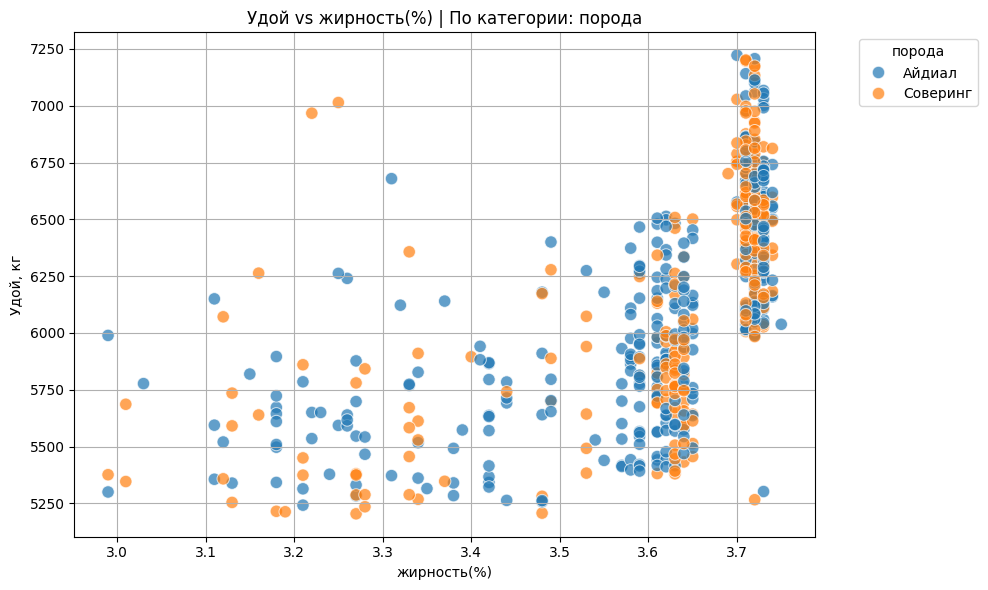

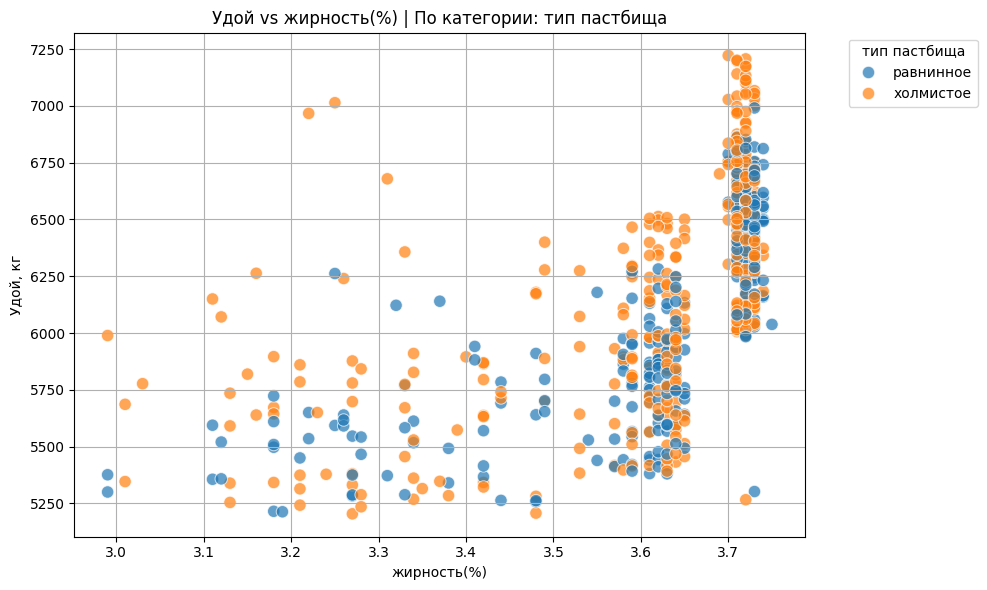

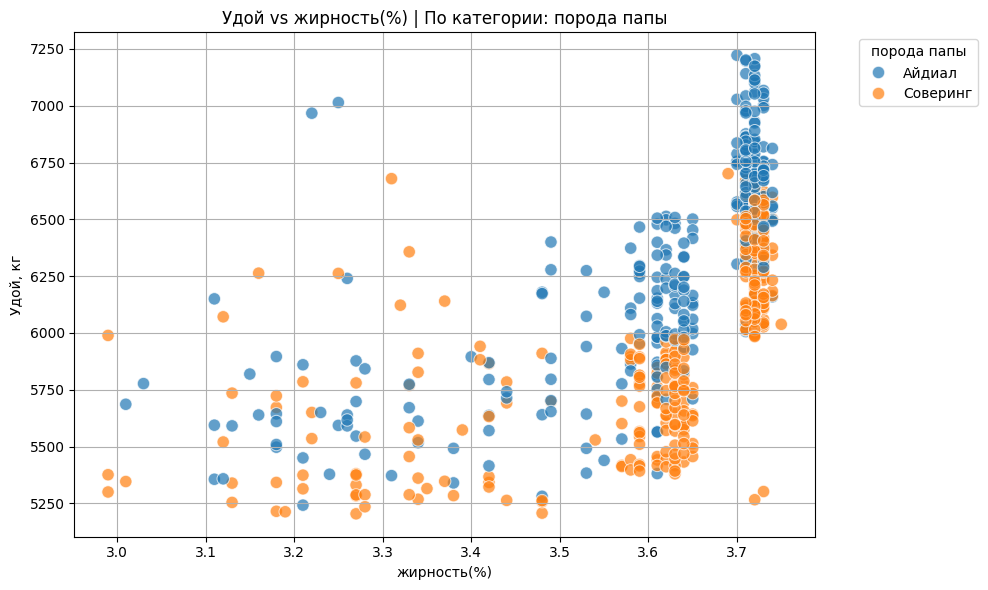

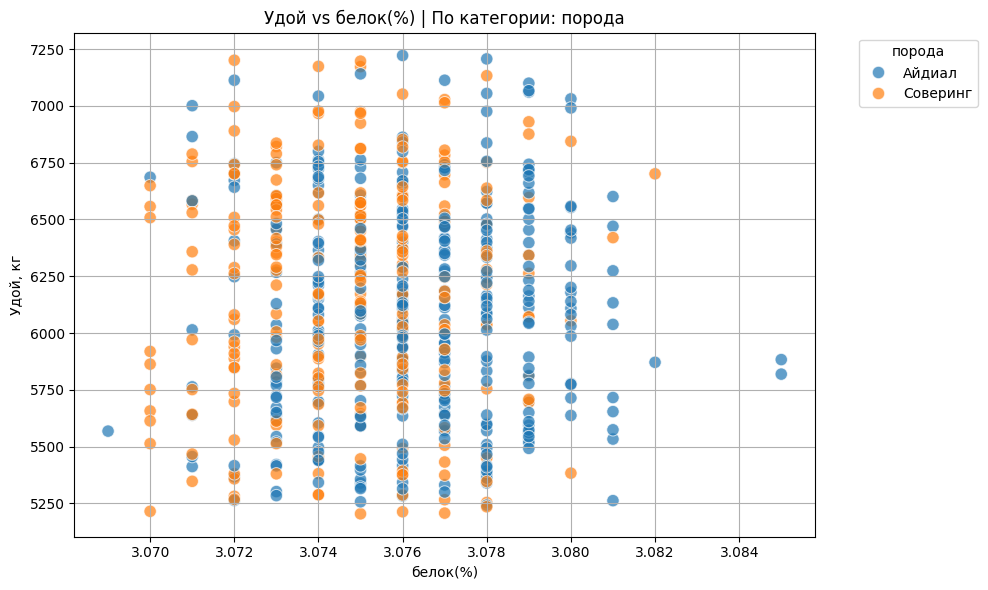

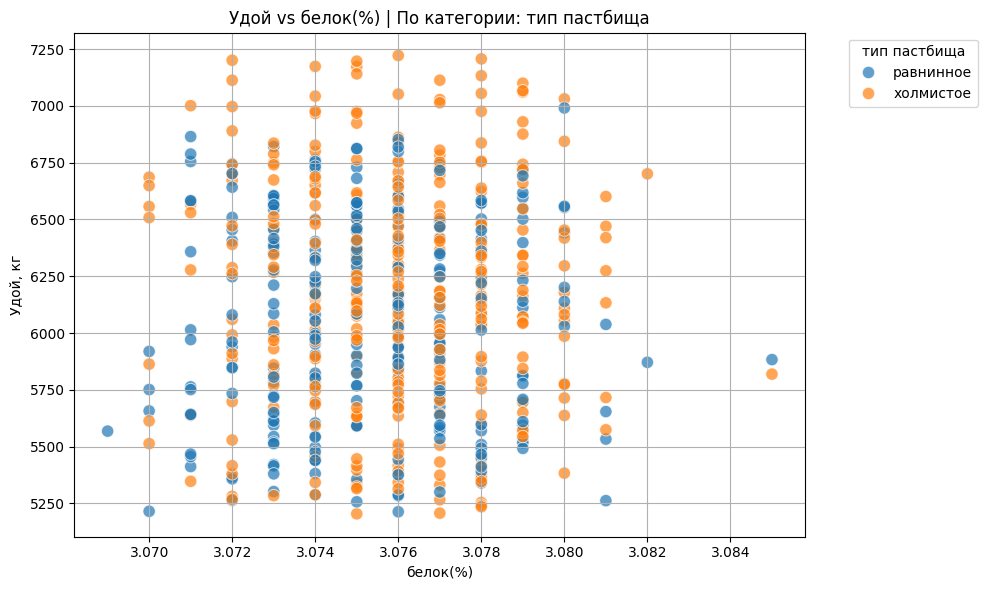

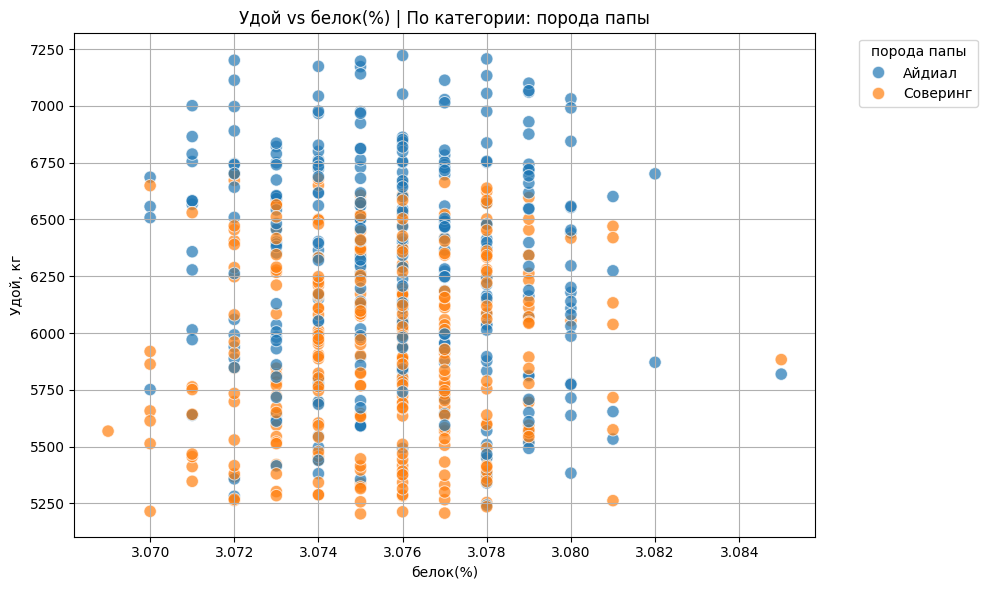

R2 LinearRegression = 0.7844078173416966


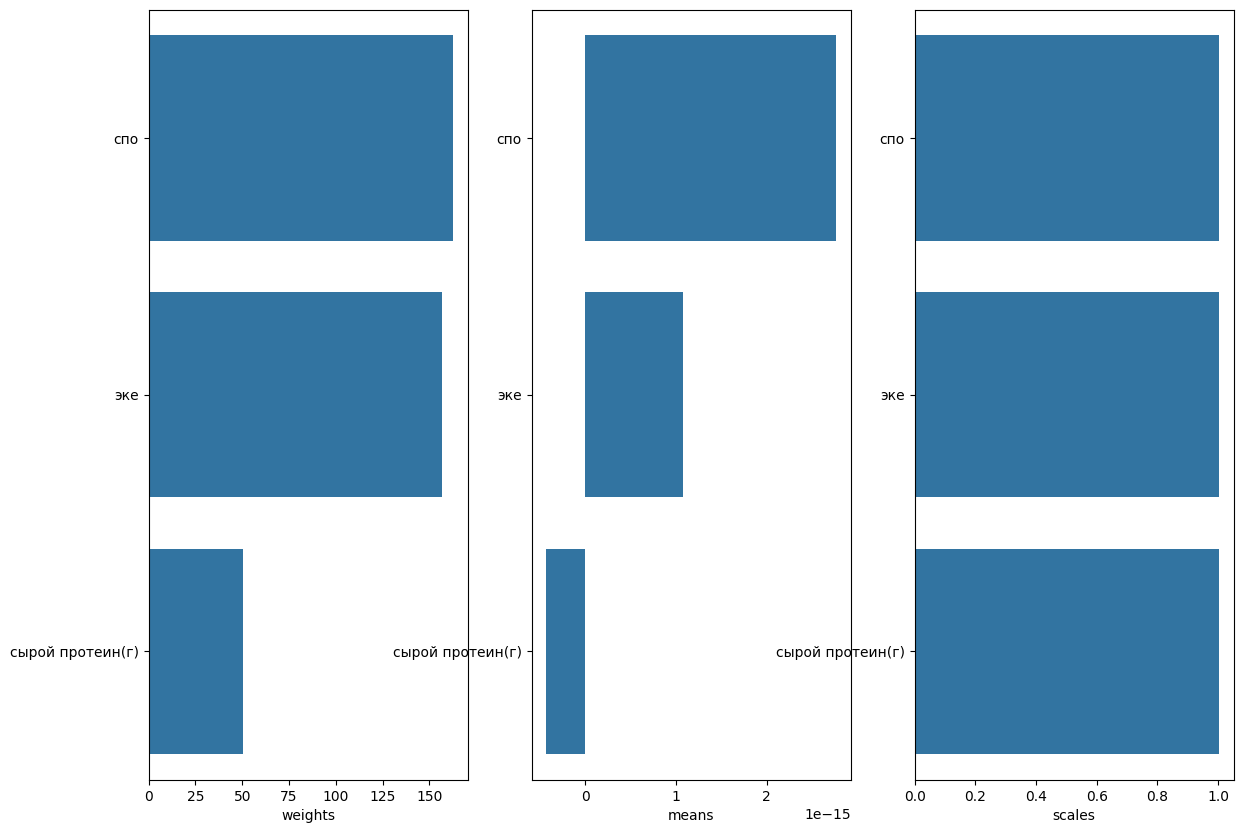

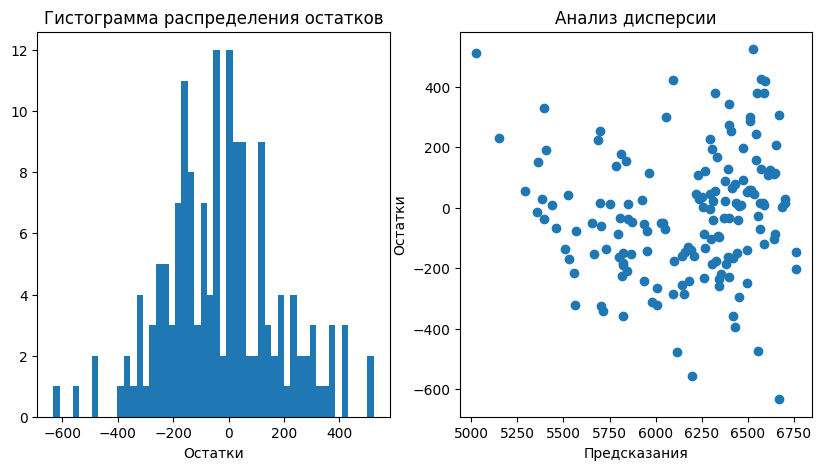

Размеры данных:
X_train: (471, 7)
X_test: (157, 7)
y_train: (471,)
y_test: (157,)

R² LinearRegression = 0.8181


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


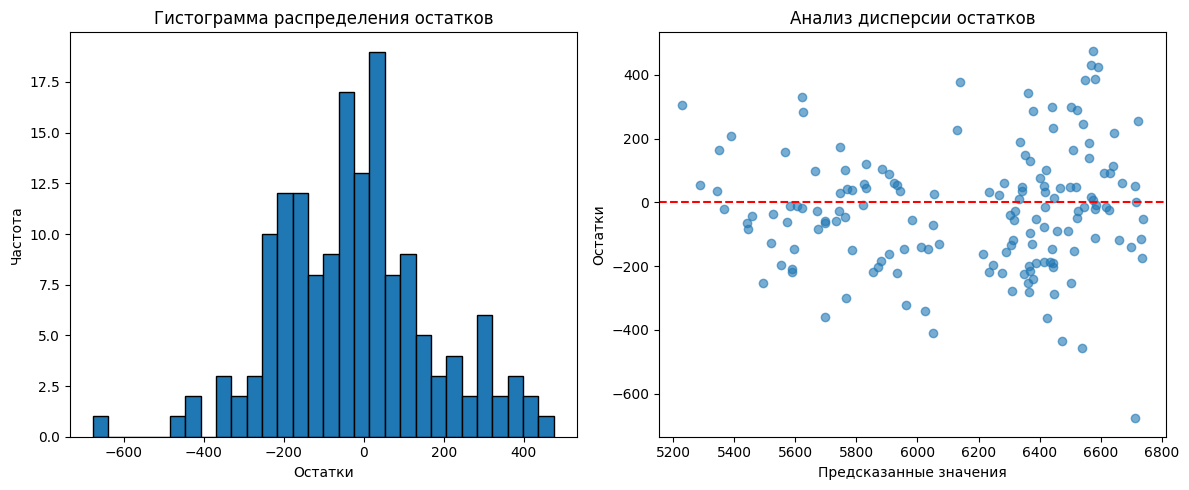

(471, 8)
(157, 8)
(471,)
(157,)
R2 LinearRegression = 0.8247542745210406


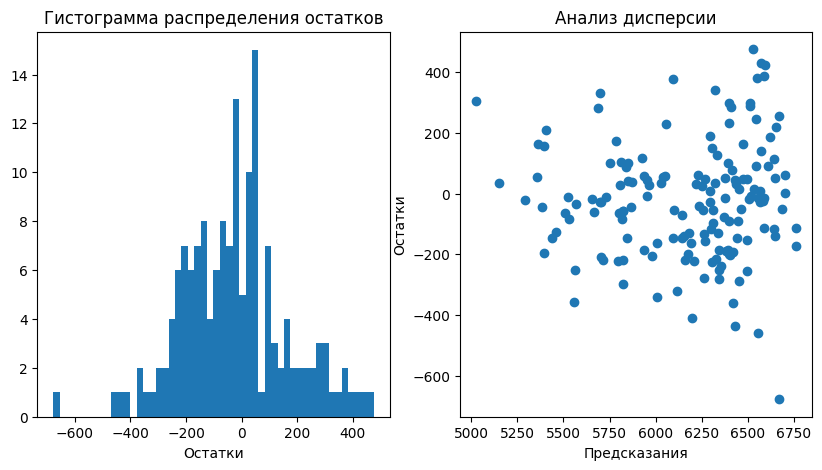

First model MSE =  43887.015009660514
First model RMSE =  209.4922791170608
First model MAE =  164.24194463474925
Second model MSE =  37030.91131113695
Second model RMSE =  192.43417396901452
Second model MAE =  149.03965222364604
Third model MSE =  35673.88988618195
Third model RMSE =  188.8753289505592
Third model MAE =  146.16302445362322


порода тип пастбища порода папы  имя папы  текущая жирность(%)  \
0     Айдиал    холмистое      Айдиал  Геркулес                 3.58   
1     Айдиал    равнинное    Соверинг    Буйный                 3.54   
2   Соверинг    равнинное    Соверинг     Барин                 3.59   
3   Соверинг    холмистое      Айдиал    Буйный                 3.40   
4   Соверинг    равнинное      Айдиал    Буйный                 3.64   
5   Соверинг    равнинное    Соверинг  Геркулес                 3.63   
6     Айдиал    холмистое      Айдиал  Геркулес                 3.58   
7     Айдиал    равнинное    Соверинг    Буйный                 3.57   
8   Соверинг    равнинное    Соверинг     Барин                 3.59   
9   Соверинг    холмистое      Айдиал    Буйный                 3.40   
10    Айдиал    холмистое    Соверинг  Соловчик                 3.73   
11  Соверинг    равнинное    Соверинг  Геркулес                 3.73   
12    Айдиал    холмистое      Айдиал  Геркулес                 3.68   
13    Айдиал    холмистое    Соверинг     Барин                 3.42   
14  Соверинг    равнинное    Соверинг     Барин                 3.59   
15  Соверинг    холмистое      Айдиал    Буйный                 3.40   
16    Айдиал    холмистое    Соверинг  Соловчик                 3.73   
17  Соверинг    равнинное    Соверинг  Геркулес                 3.77   
18    Айдиал    равнинное    Соверинг    Буйный                 3.34   
19  Соверинг    равнинное      Айдиал    Буйный                 3.64   

    текущий белок(%)      возраст        эке  сырой_протеин(г)    спо  \
0              3.076  более_2_лет  15.276162       2019.947532  0.966   
1              3.081  менее_2_лет  15.276162       2019.947532  0.966   
2              3.074  более_2_лет  15.276162       2019.947532  0.966   
3              3.061  более_2_лет  15.276162       2019.947532  0.966   
4              3.074  более_2_лет  15.276162       2019.947532  0.966   
5              3.053  менее_2_лет  15.276162       2019.947532  0.966   
6              3.076  более_2_лет  15.276162       2019.947532  0.966   
7              3.079  более_2_лет  15.276162       2019.947532  0.966   
8              3.074  более_2_лет  15.276162       2019.947532  0.966   
9              3.079  менее_2_лет  15.276162       2019.947532  0.966   
10             3.055  более_2_лет  15.276162       2019.947532  0.966   
11             3.073  более_2_лет  15.276162       2019.947532  0.966   
12             3.046  более_2_лет  15.276162       2019.947532  0.966   
13             3.075  менее_2_лет  15.276162       2019.947532  0.966   
14             3.074  более_2_лет  15.276162       2019.947532  0.966   
15             3.065  более_2_лет  15.276162       2019.947532  0.966   
16             3.079  более_2_лет  15.276162       2019.947532  0.966   
17             3.053  менее_2_лет  15.276162       2019.947532  0.966   
18             3.069  более_2_лет  15.276162       2019.947532  0.966   
19             3.074  более_2_лет  15.276162       2019.947532  0.966   

       удой(кг)  
0   6609.919297  
1   6378.711028  
2   6283.999775  
3   6593.089377  
4   6542.146066  
5   6425.380218  
6   6609.919297  
7   6571.259737  
8   6283.999775  
9   6400.540668  
10  6344.707860  
11  6617.928926  
12  6609.919297  
13  6127.474742  
14  6283.999775  
15  6593.089377  
16  6344.707860  
17  6425.380218  
18  6571.259737  
19  6542.146066

LogisticRegression model Accuracy =  0.688
LogisticRegression model Precision (вкусно) =  0.719
LogisticRegression model Recall (вкусно) =  0.727
[np.float64(0.5), np.float64(0.62), np.float64(0.75), np.float64(0.88)]
y_pred_0.5 Precision =  0.7191011235955056
y_pred_0.62 Precision =  0.8536585365853658
y_pred_0.75 Precision =  1.0
y_pred_0.88 Precision =  0.0
[np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4)]
y_pred_0.1 Precision =  0.5605095541401274
y_pred_0.2 Precision =  0.5641025641025641
y_pred_0.3 Precision =  0.574468085106383
y_pred_0.4 Precision =  0.628099173553719
y_pred_0.71 Precision =  0.9
y_pred_0.72 Precision =  1.0
y_pred_0.73 Precision =  1.0
y_pred_0.74 Precision =  1.0
y_pred_0.75 Precision =  1.0
y_pred_0.76 Precision =  1.0
y_pred_0.77 Precision =  1.0
y_pred_0.78 Precision =  1.0
y_pred_0.79 Precision =  0.0
y_pred_0.62 Precision =  0.8536585365853658
y_pred_0.63 Precision =  0.85
y_pred_0.64 Precision =  0.8648648648648649
y_pred_0.65 Precisi

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

порода тип пастбища порода папы  имя папы  жирность(%)  белок(%)  \
0     Айдиал    холмистое      Айдиал  Геркулес         3.58     3.076   
1     Айдиал    равнинное    Соверинг    Буйный         3.54     3.081   
2   Соверинг    равнинное    Соверинг     Барин         3.59     3.074   
3   Соверинг    холмистое      Айдиал    Буйный         3.40     3.061   
4   Соверинг    равнинное      Айдиал    Буйный         3.64     3.074   
5   Соверинг    равнинное    Соверинг  Геркулес         3.63     3.053   
6     Айдиал    холмистое      Айдиал  Геркулес         3.58     3.076   
7     Айдиал    равнинное    Соверинг    Буйный         3.57     3.079   
8   Соверинг    равнинное    Соверинг     Барин         3.59     3.074   
9   Соверинг    холмистое      Айдиал    Буйный         3.40     3.079   
10    Айдиал    холмистое    Соверинг  Соловчик         3.73     3.055   
11  Соверинг    равнинное    Соверинг  Геркулес         3.73     3.073   
12    Айдиал    холмистое      Айдиал  Геркулес         3.68     3.046   
13    Айдиал    холмистое    Соверинг     Барин         3.42     3.075   
14  Соверинг    равнинное    Соверинг     Барин         3.59     3.074   
15  Соверинг    холмистое      Айдиал    Буйный         3.40     3.065   
16    Айдиал    холмистое    Соверинг  Соловчик         3.73     3.079   
17  Соверинг    равнинное    Соверинг  Геркулес         3.77     3.053   
18    Айдиал    равнинное    Соверинг    Буйный         3.34     3.069   
19  Соверинг    равнинное      Айдиал    Буйный         3.64     3.074   

        возраст        эке  сырой протеин(г)         спо       эке_2  
0   более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
1   менее_2_лет  15.276162       2019.947532  более_0.92  233.361138  
2   более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
3   более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
4   более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
5   менее_2_лет  15.276162       2019.947532  более_0.92  233.361138  
6   более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
7   более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
8   более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
9   менее_2_лет  15.276162       2019.947532  более_0.92  233.361138  
10  более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
11  более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
12  более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
13  менее_2_лет  15.276162       2019.947532  более_0.92  233.361138  
14  более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
15  более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
16  более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
17  менее_2_лет  15.276162       2019.947532  более_0.92  233.361138  
18  более_2_лет  15.276162       2019.947532  более_0.92  233.361138  
19  более_2_лет  15.276162       2019.947532  более_0.92  233.361138

Ошибка преобразования: "['сырой_протеин(г)'] not in index"


Empty DataFrame
Columns: [порода, тип пастбища, порода папы, имя папы, текущая жирность(%), текущий белок(%), возраст, эке, сырой_протеин(г), спо, удой(кг), вкус]
Index: []

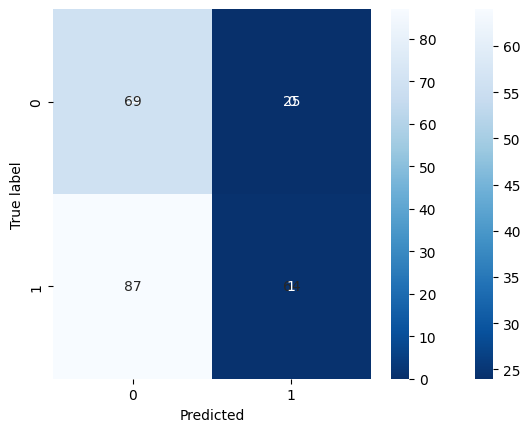

In [17]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
              confusion_matrix, mean_absolute_error, mean_squared_error,
               precision_score, recall_score,r2_score, root_mean_squared_error, f1_score)
f = pd.read_csv('datasets/ferma_main.csv',sep=';')
fd =  pd.read_csv('datasets/ferma_dad.csv',sep=';')
cb = pd.read_csv('datasets/cow_buy.csv',sep=';')
f.info()
fd.info()
cb.info()
print(f.duplicated().sum())
f[f.duplicated(keep=False)]
f= f.drop_duplicates()
print(f.duplicated().sum())
fd.duplicated().sum()
print(cb.duplicated().sum())
cb[cb.duplicated(keep=False)]
print(f.isnull().sum())
print(fd.isnull().sum())
print(cb.isnull().sum())
f.columns = ['id', 'удой(кг)', 'эке', 'сырой протеин(г)', 'спо', 'порода', 'тип пастбища', 'порода папы', 'жирность(%)', 'белок(%)', 'вкус', 'возраст']
fd.columns = ['id', 'имя папы']
cb.columns = ['порода', 'тип пастбища', 'порода папы', 'имя папы', 'текущая жирность(%)', 'текущий белок(%)', 'возраст']
col_f = ['эке', 'спо', 'жирность(%)', 'белок(%)']
for col in col_f:
    f[col] = f[col].replace(to_replace = ',', value = '.', regex = True)

    f[col] = f[col].astype('float')

col_cb = ['текущая жирность(%)', 'текущий белок(%)']
for col in col_cb:
    cb[col] = cb[col].replace(to_replace = ',', value = '.', regex = True)
    cb[col] = cb[col].astype('float')
f['тип пастбища'] = f['тип пастбища'].str.lower()
print(f['тип пастбища'].unique())
print(cb['тип пастбища'].unique())
f['тип пастбища'] = f['тип пастбища'].replace('равнинные', 'равнинное')
print(f['тип пастбища'].unique())
f['порода'].value_counts()
cb['порода'].value_counts()
f['порода папы'].value_counts()
cb['порода папы'].value_counts()
f['порода'] = f['порода'].replace('Вис Бик Айдиал', 'Айдиал')
f['порода'] = f['порода'].replace('РефлешнСоверинг', 'Соверинг')
cb['порода'] = cb['порода'].replace('Вис Бик Айдиал', 'Айдиал')
cb['порода'] = cb['порода'].replace('РефлешнСоверинг', 'Соверинг')
f['порода папы'] = f['порода папы'].replace('Соверин', 'Соверинг')
f['порода папы'] = f['порода папы'].replace('Айдиалл', 'Айдиал')
cb['порода папы'] = cb['порода папы'].replace('Соверин', 'Соверинг')
f['порода'].value_counts()
cb['порода'].value_counts()
f['порода папы'].value_counts()
cb['порода папы'].value_counts()
f.info()
ferma_num_cols_names = ['удой(кг)', 'эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']
print('Статистический анализ датафрейма "ferma"')
f[ferma_num_cols_names].describe().T
print('Статистический анализ датафрейма "cow_buy"')
cb.describe().T

def grafic(freim):
    num_cols = freim.select_dtypes(include=["float64", "int64"]).columns

    for col in num_cols:
        plt.figure(figsize=(6, 4))

        # Гистограмма + KDE
        sns.histplot(freim[col], kde=True, bins=20)
        plt.title(f"Распределение {col}")
        plt.xlabel(col)
        plt.ylabel("Частота")
        plt.show()

        # Боксплот
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=freim[col])
        plt.title(f"Боксплот {col}")
        plt.show()
def grafic_categor(freim):
    categorical = freim.select_dtypes(include=['object', 'category', 'bool']).columns
    for column in categorical:
        plt.figure(figsize=(10, 4))

    # Столбчатая диаграмма
        sns.countplot(x=freim[column])
        plt.title(f'Частота категорий в {column}')
        plt.xticks(rotation=45)
        plt.show()

    # Круговая диаграмма (если категорий < 7)
        if freim[column].nunique() <= 7:
            freim[column].value_counts().plot.pie(autopct='%1.1f%%')
            plt.title(f'Доли категорий в {column}')
            plt.show()


f = f.loc[f['удой(кг)'] < 8000]
grafic(f)
grafic_categor(f)
grafic(fd)
grafic(cb)
grafic_categor(cb)
# Расчет корреляционной матрицы (по умолчанию метод Пирсона)
correlation_matrix = f.drop('id', axis=1).corr(numeric_only=True)
# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,  # Фиксируем диапазон значений от -1 до 1
    vmax=1)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()
# Список количественных признаков
quant_features = ['эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']
# Категориальные признаки для цвета
cat_features = ['порода', 'тип пастбища', 'порода папы']
# Построение scatterplot для каждого количественного признака
for feature in quant_features:
    for cat_feature in cat_features:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=f, x=feature, y='удой(кг)',hue=cat_feature,
            palette='tab10', alpha=0.7,s=80 )
        plt.title(f'Удой vs {feature} | По категории: {cat_feature}')
        plt.xlabel(feature)
        plt.ylabel('Удой, кг')
        plt.legend(title=cat_feature, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


X = f[['эке', 'сырой протеин(г)', 'спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']]
y = f['удой(кг)']

# Split data
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error')
cat_col_names = ['порода', 'тип пастбища', 'возраст', 'порода папы']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Scale numerical features
num_col_names = ['эке', 'сырой протеин(г)', 'спо']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
# Combine features
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
# Train model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


predictions = model_lr.predict(X_test)

# Evaluate
r2_lr = r2_score(y_test, predictions)
print("R2 LinearRegression =", r2_lr)

# Plot weights
fig, axes = plt.subplots(figsize=(14,10), ncols=3)

# Sort features by weight (using only numerical features for simplicity)
sorted_idx = np.argsort(model_lr.coef_[-3:])[::-1]  # Last 3 coefficients are for numerical features
sorted_weights = model_lr.coef_[-3:][sorted_idx]
sorted_features = np.array(num_col_names)[sorted_idx]
sorted_means = X_train[num_col_names].mean().values[sorted_idx]
sorted_scales = X_train[num_col_names].std().values[sorted_idx]

sns.barplot(y=sorted_features, x=sorted_weights, ax=axes[0])
axes[0].set_xlabel('weights')
sns.barplot(y=sorted_features, x=sorted_means, ax=axes[1])
axes[1].set_xlabel('means')
sns.barplot(y=sorted_features, x=sorted_scales, ax=axes[2])
axes[2].set_xlabel('scales')
# Plot residuals
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(x=predictions, y=residuals)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')
plt.show()
f['спо'] = f['спо'].apply(lambda x: 'менее_0.92' if x<0.91 else 'более_0.92')
f['эке_2'] = f['эке'].apply(lambda x: x**2)


X = f[['эке_2', 'сырой протеин(г)', 'спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']]
y = f['удой(кг)']

# Разделение данных
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print("Размеры данных:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Кодирование категориальных переменных (возвращает sparse matrix)
encoder = OneHotEncoder(drop='first', handle_unknown='error')
cat_col_names = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# Получаем имена фич
encoder_col_names = encoder.get_feature_names_out(input_features=cat_col_names)

# Преобразуем sparse matrix в DataFrame
X_train_ohe = pd.DataFrame.sparse.from_spmatrix(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame.sparse.from_spmatrix(X_test_ohe, columns=encoder_col_names)

# Масштабирование числовых переменных
scaler = StandardScaler()


num_col_names = ['эке_2', 'сырой протеин(г)']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединение признаков
X_train_processed = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_processed = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_processed, y_train)
predictions_2 = model_lr_2.predict(X_test_processed)

# Оценка модели
r2_lr_2 = r2_score(y_test, predictions_2)
print("\nR² LinearRegression =", round(r2_lr_2, 4))

# Анализ остатков
residuals = y_test - predictions_2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].hist(residuals, bins=30, edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частота')

axes[1].scatter(x=predictions_2, y=residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Анализ дисперсии остатков')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')

plt.tight_layout()
plt.show()

ferma = f.merge(fd, on='id', how='left')
X = ferma[['эке_2', 'сырой протеин(г)', 'спо', 'порода', 'тип пастбища', 'возраст', 'порода папы', 'имя папы']]
y = ferma['удой(кг)']
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error')
cat_col_names = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы', 'имя папы']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой протеин(г)']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
# Train model
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)


r2_lr_3 = r2_score(y_test, predictions_3)
print("R2 LinearRegression =", r2_lr_3)
residuals_3 = y_test - predictions_3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(x=predictions, y=residuals)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания')
axes[1].set_ylabel('Остатки')
plt.show()
mse_1 = mean_squared_error(y_test, predictions)
rmse_1 = root_mean_squared_error(y_test, predictions)
mae_1 = mean_absolute_error(y_test, predictions)
print('First model MSE = ', mse_1)
print('First model RMSE = ', rmse_1)
print('First model MAE = ', mae_1)
mse_2 = mean_squared_error(y_test, predictions_2)
rmse_2 = root_mean_squared_error(y_test, predictions_2)
mae_2 = mean_absolute_error(y_test, predictions_2)
print('Second model MSE = ', mse_2)
print('Second model RMSE = ', rmse_2)
print('Second model MAE = ', mae_2)
mse_3 = mean_squared_error(y_test, predictions_3)
rmse_3 = root_mean_squared_error(y_test, predictions_3)
mae_3 = mean_absolute_error(y_test, predictions_3)
print('Third model MSE = ', mse_3)
print('Third model RMSE = ', rmse_3)
print('Third model MAE = ', mae_3)
st.t.interval(confidence=0.95, df=len(predictions_3)-1, loc=np.mean(predictions_3), scale=st.sem(predictions_3))

f_copy = f.copy()

# Очищаем строку от букв и заменяем на Float
f_copy['спо'] = f_copy['спо'].str.extract(r'(\d+\.\d+)').astype(float)

eke = f_copy['эке'].mean()
spo = f_copy['спо'].mean()
sp = f_copy['сырой протеин(г)'].mean()
cb['эке'] = eke * 1.05
cb['сырой_протеин(г)'] = sp * 1.05
cb['спо'] = spo * 1.05


# Create copy for transformations
cb_copy = cb.copy()

# Transform 'спо' to categorical
cb_copy['спо'] = cb['спо'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')
cb_copy['эке_2'] = cb['эке'].apply(lambda x: x**2)

# One-hot encoding using pre-trained encoder
cat_col_names = ['спо', 'порода', 'тип пастбища', 'возраст', 'порода папы', 'имя папы']
cow_buy_ohe = encoder.transform(cb_copy[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

# Scaling numerical features using pre-trained scaler
# Переименовываем обратно в то, что было при fit (с пробелом)
cb_copy = cb_copy.rename(columns={'сырой_протеин(г)': 'сырой протеин(г)'})

# Обновляем список имен (тоже с пробелом)
num_col_names = ['эке_2', 'сырой протеин(г)']

# Теперь трансформация сработает
cow_buy_scaled = scaler.transform(cb_copy[num_col_names])

# 1. Превращаем результат OHE в DataFrame
df_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

# 2. Превращаем результат скейлера в DataFrame
df_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

# 3. Объединяем их (axis=1 — склейка по горизонтали)
# Обязательно сбрасываем индексы, чтобы они состыковались правильно
cow_buy_new = pd.concat([df_ohe.reset_index(drop=True),
                         df_scaled.reset_index(drop=True)], axis=1)

# Ensure all expected columns are present
expected_columns = model_lr_3.feature_names_in_ if hasattr(model_lr_3, 'feature_names_in_') else None
if expected_columns is not None:
    missing_cols = set(expected_columns) - set(cow_buy_new.columns)
    for col in missing_cols:
        cow_buy_new[col] = 0  # Add missing columns with 0 values
    # Reorder columns to match model's expectation
    cow_buy_new = cow_buy_new[expected_columns]

# Make predictions
cb['удой(кг)'] = model_lr_3.predict(cow_buy_new)
display(cb)


y = ferma['вкус']
X = ferma[['эке_2', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)', 'тип пастбища', 'возраст']]

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

# Преобразование меток (вкусно=1, не вкусно=0)
y_train = y_train.map({'вкусно': 1, 'не вкусно': 0}).astype(int)
y_test = y_test.map({'вкусно': 1, 'не вкусно': 0}).astype(int)

# OneHotEncoding для категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error')
cat_col_names = ['спо', 'тип пастбища', 'возраст']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Масштабирование числовых признаков
scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой протеин(г)', 'жирность(%)', 'белок(%)']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Объединение признаков


X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели с учетом дисбаланса классов
clf = LogisticRegression(class_weight='balanced')  # Добавляем балансировку классов
clf.fit(X_train, y_train)

# Предсказание и оценка с правильным порядком классов
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Вероятность класса 1 ("вкусно")

# Вычисление метрик с явным указанием позитивного класса
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Явно указываем pos_label=1 ("вкусно")
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print('LogisticRegression model Accuracy = ', round(accuracy, 3))
print('LogisticRegression model Precision (вкусно) = ', round(precision, 3))
print('LogisticRegression model Recall (вкусно) = ', round(recall, 3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 4,endpoint=False)]
print(thresholds)
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []




for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()
print('y_pred_0.5 Precision = ', precision_score(y_test, data['y_pred_0.5']))
print('y_pred_0.62 Precision = ', precision_score(data['y_valid'], data['y_pred_0.62']))
print('y_pred_0.75 Precision = ', precision_score(data['y_valid'], data['y_pred_0.75']))
print('y_pred_0.88 Precision = ', precision_score(data['y_valid'], data['y_pred_0.88']))
thresholds = [round(i,2) for i in np.linspace(0.1,0.5,num = 4,endpoint=False)]
print(thresholds)
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()
for i in thresholds:
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
thresholds = [0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds:


    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
thresholds = [0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds:
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
thresholds = [0.78, 0.781, 0.782, 0.783, 0.784, 0.785, 0.786, 0.787, 0.788, 0.789]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
for i in thresholds:
    print(f'y_pred_{i} Precision = ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
y_pred_new_threshold = (clf.predict_proba(X_test)[:, 1] >= 0.781).astype(int)
accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)
print('LogisticRegression model Accuracy = ', round(accuracy, 3))
print('LogisticRegression model Precision = ', round(precision, 3))
print('LogisticRegression model Recall = ', round(recall, 3))


cm = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');
cb_copy = cb_copy.rename(columns={
    'текущая жирность(%)': 'жирность(%)',
    'текущий белок(%)': 'белок(%)',
    'сырой_протеин(r)': 'сырой протеин(г)'
})
display(cb_copy)
try:
    # Числовые признаки
    num_features = ['эке_2', 'сырой_протеин(г)', 'жирность(%)', 'белок(%)']
    X_scaled = scaler.transform(cb_copy[num_features])
    X_scaled = pd.DataFrame(X_scaled, columns=num_features)

    # Категориальные признаки
    cat_features = ['спо', 'тип пастбища', 'возраст']
    X_ohe = encoder.transform(cb_copy[cat_features])
    encoder_col_names = encoder.get_feature_names_out()
    X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

    # Объединяем признаки
    X_new = pd.concat([X_ohe, X_scaled], axis=1)
    # Проверяем соответствие модели
    if hasattr(clf, 'feature_names_in_'):
        X_new = X_new[clf.feature_names_in_]
    # Предсказание (1 = вкусно) - исправлено использование map
    taste_pred = (clf.predict_proba(X_new)[:, 1] >= 0.62).astype(int)
    cb['вкус'] = ['вкусно' if x == 1 else 'не вкусно' for x in taste_pred]
except Exception as e:
    print(f"Ошибка преобразования: {e}")
    cb['вкус'] = 'не определено'
# Фильтрация результата
result = cb.loc[(cb['удой(кг)'] > 6000) & (cb['вкус'] == 'вкусно')]
display(result)




Первые 5 строк данных:
            Sales
Month            
1964-01-01   2815
1964-02-01   2672
1964-03-01   2755
1964-04-01   2721
1964-05-01   2946

Проверка пропущенных значений:
Sales    0
dtype: int64


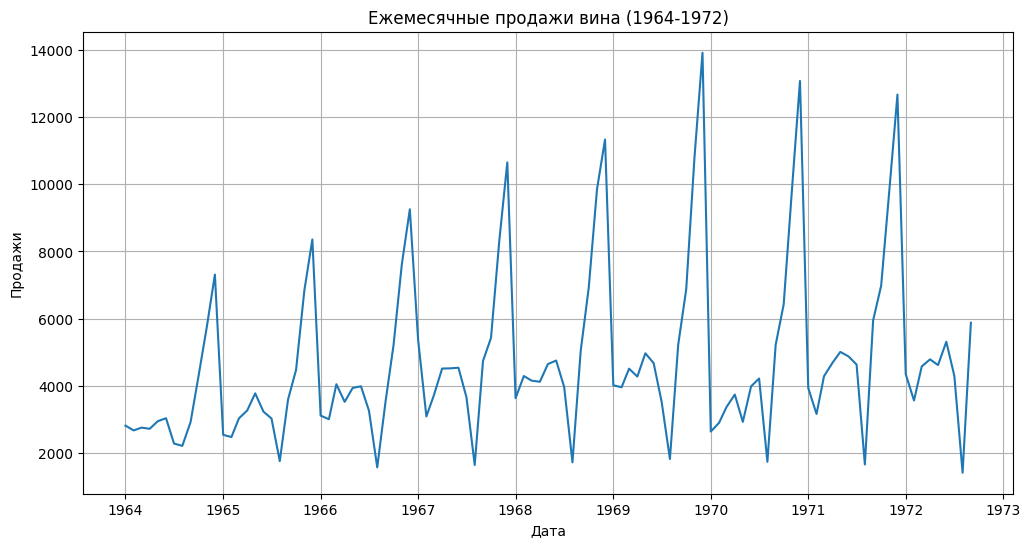


Тест Дики-Фуллера для исходного ряда:

Результаты теста Дики-Фуллера:
Тестовая статистика           -1.833593
p-value                        0.363916
#Lags Used                    11.000000
Количество наблюдений         93.000000
Критическое значение (1%)     -3.502705
Критическое значение (5%)     -2.893158
Критическое значение (10%)    -2.583637
dtype: float64

Тест Дики-Фуллера после дифференцирования:

Результаты теста Дики-Фуллера:
Тестовая статистика          -7.189896e+00
p-value                       2.519620e-10
#Lags Used                    1.100000e+01
Количество наблюдений         9.200000e+01
Критическое значение (1%)    -3.503515e+00
Критическое значение (5%)    -2.893508e+00
Критическое значение (10%)   -2.583824e+00
dtype: float64

Декомпозиция временного ряда:


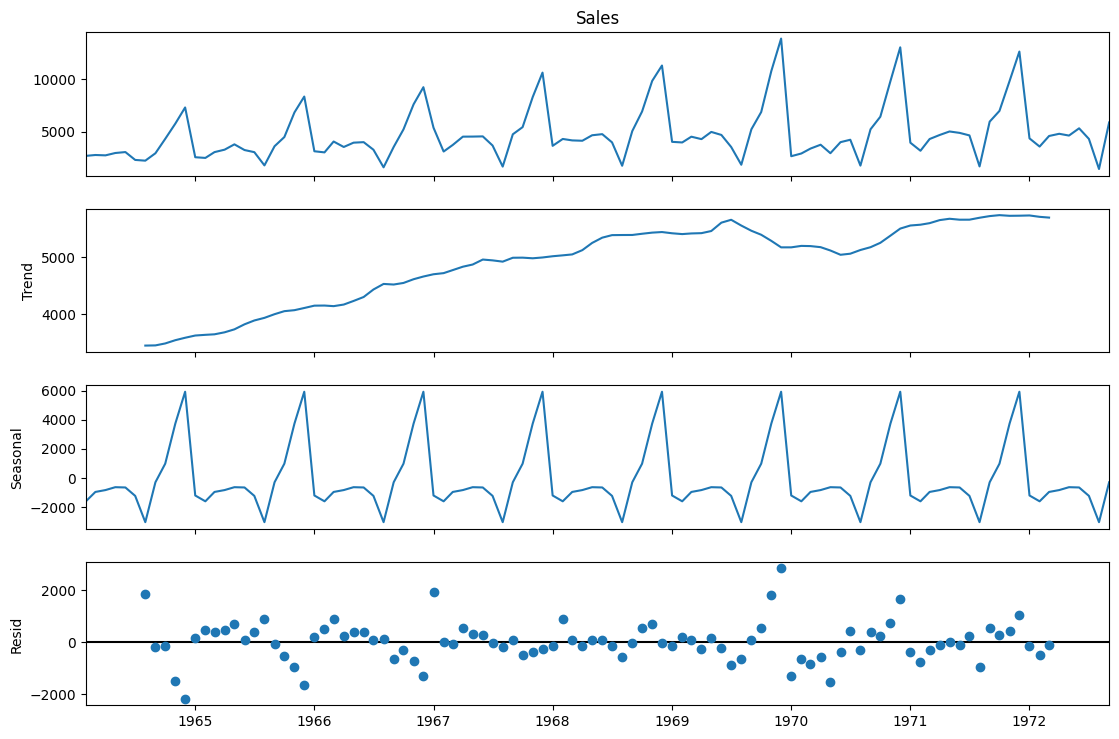


Графики автокорреляции и частичной автокорреляции:


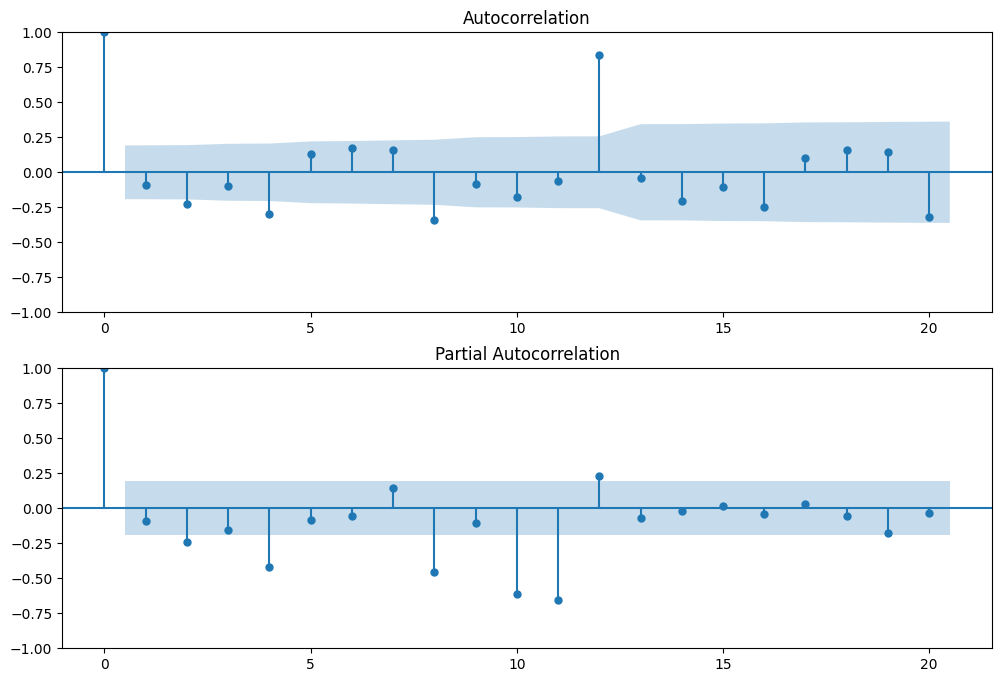


Построение модели ARIMA(1,1,1):
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -749.347
Date:                Sun, 15 Feb 2026   AIC                           1504.693
Time:                        14:23:37   BIC                           1511.913
Sample:                    02-01-1964   HQIC                          1507.592
                         - 12-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5464      0.174      3.147      0.002       0.206       0.887
ma.L1         -0.9547      0.106     -9.015      0.000      -1.162      -0.747
sigma2      4.994e+

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   83
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -564.083
Date:                            Sun, 15 Feb 2026   AIC                           1138.166
Time:                                    14:23:38   BIC                           1149.408
Sample:                                02-01-1964   HQIC                          1142.632
                                     - 12-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1566      0.143      1.097      0.273      -0.123       0.436
ma.L1         -0.9022      0.077   

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


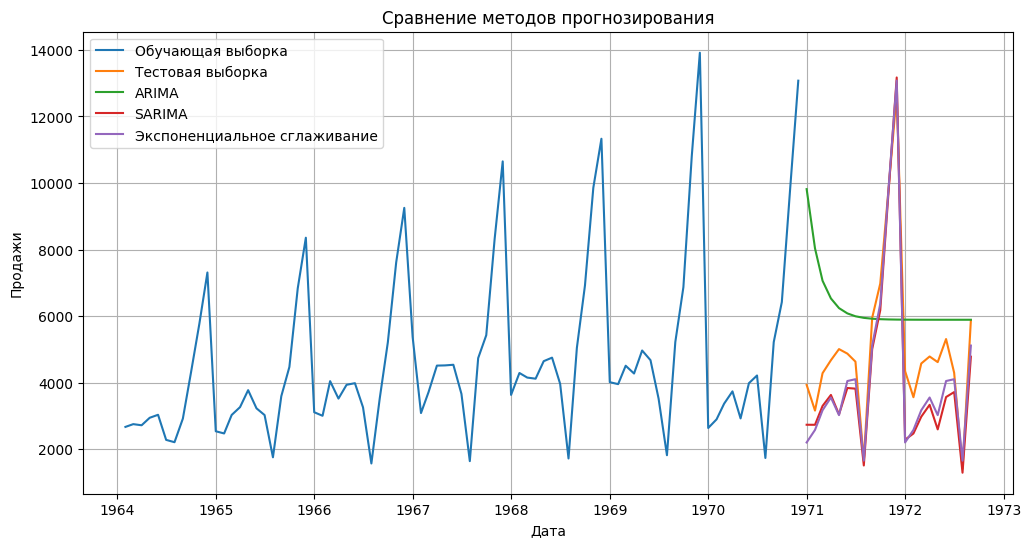


Оценка качества моделей:
RMSE ARIMA: 3013.73
RMSE SARIMA: 1191.82
RMSE Экспоненциальное сглаживание: 1108.54


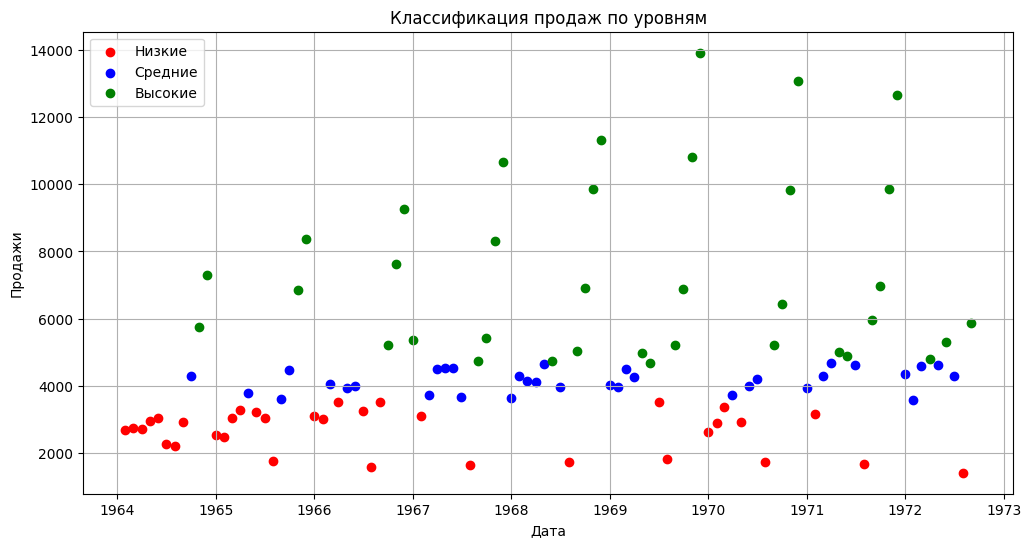


Распределение классов продаж:
Class
Высокие    36
Низкие     34
Средние    34
Name: count, dtype: int64


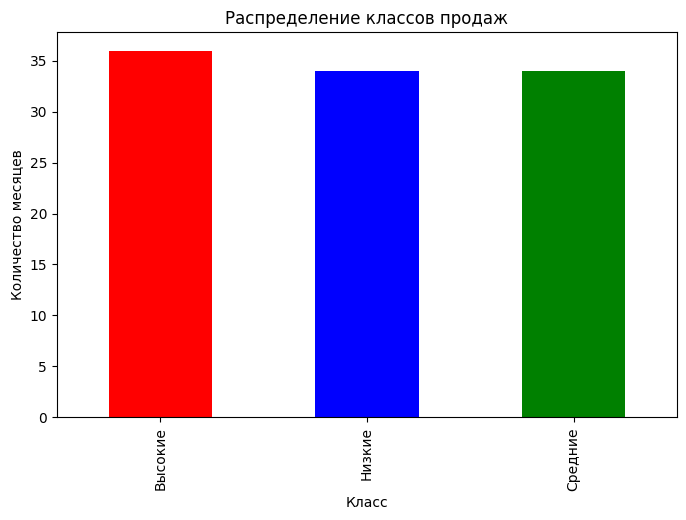

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

data = pd.read_csv('monthly_champagne_sales.csv', parse_dates=['Month'], index_col='Month')
data.columns = ['Sales']

# 1. Предобработка данных и визуализация
print("Первые 5 строк данных:")
print(data.head())

# Проверка на пропуски
print("\nПроверка пропущенных значений:")
print(data.isnull().sum())

# Визуализация исходного ряда
plt.figure(figsize=(12,6))
plt.plot(data)
plt.title('Ежемесячные продажи вина (1964-1972)')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid()
plt.show()

# 2. Проверка на стационарность
def adf_test(timeseries):
    """Функция для выполнения теста Дики-Фуллера"""
    print('\nРезультаты теста Дики-Фуллера:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                        index=['Тестовая статистика', 'p-value', '#Lags Used', 'Количество наблюдений'])
    for key, value in dftest[4].items():
        dfoutput[f'Критическое значение ({key})'] = value
    print(dfoutput)

print("\nТест Дики-Фуллера для исходного ряда:")
adf_test(data['Sales'])

# Разностное преобразование для стационарности
data['Sales_diff'] = data['Sales'] - data['Sales'].shift(1)
data.dropna(inplace=True)

print("\nТест Дики-Фуллера после дифференцирования:")
adf_test(data['Sales_diff'])

# 3. Декомпозиция временного ряда
print("\nДекомпозиция временного ряда:")
decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

# 4. Анализ автокорреляции
print("\nГрафики автокорреляции и частичной автокорреляции:")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Sales_diff'], lags=20, ax=ax1)
plot_pacf(data['Sales_diff'], lags=20, ax=ax2)
plt.show()

# 5. Прогнозирование с помощью моделей

# Разделение на обучающую и тестовую выборки (80/20)
train_size = int(0.8 * len(data))
train, test = data['Sales'][:train_size], data['Sales'][train_size:]

# Модель ARIMA
print("\nПостроение модели ARIMA(1,1,1):")
model_arima = ARIMA(train, order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

# Прогнозирование ARIMA
forecast_arima = model_arima_fit.forecast(steps=len(test))
forecast_arima = pd.Series(forecast_arima, index=test.index)

# Модель SARIMA (учитывает сезонность)
print("\nПостроение модели SARIMA(1,1,1)(1,1,1,12):")
model_sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

# Прогнозирование SARIMA
forecast_sarima = model_sarima_fit.forecast(steps=len(test))

# Модель экспоненциального сглаживания
print("\nПостроение модели экспоненциального сглаживания:")
model_exp = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
model_exp_fit = model_exp.fit()
forecast_exp = model_exp_fit.forecast(len(test))

# 6. Визуализация результатов прогнозирования
plt.figure(figsize=(12, 6))
plt.plot(train, label='Обучающая выборка')
plt.plot(test, label='Тестовая выборка')
plt.plot(forecast_arima, label='ARIMA')
plt.plot(forecast_sarima, label='SARIMA')
plt.plot(forecast_exp, label='Экспоненциальное сглаживание')
plt.title('Сравнение методов прогнозирования')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.grid()
plt.show()

# 7. Оценка качества моделей
rmse_arima = sqrt(mean_squared_error(test, forecast_arima))
rmse_sarima = sqrt(mean_squared_error(test, forecast_sarima))
rmse_exp = sqrt(mean_squared_error(test, forecast_exp))

print("\nОценка качества моделей:")
print(f"RMSE ARIMA: {rmse_arima:.2f}")
print(f"RMSE SARIMA: {rmse_sarima:.2f}")
print(f"RMSE Экспоненциальное сглаживание: {rmse_exp:.2f}")

# 8. Дополнительное задание: классификация данных временного ряда

# Создание классов на основе квантилей
quantiles = data['Sales'].quantile([0.33, 0.66]).values
data['Class'] = pd.cut(data['Sales'],
                      bins=[-np.inf, quantiles[0], quantiles[1], np.inf],
                      labels=['Низкие', 'Средние', 'Высокие'])

# Визуализация классов
plt.figure(figsize=(12, 6))
colors = {'Низкие': 'red', 'Средние': 'blue', 'Высокие': 'green'}
for cls in data['Class'].unique():
    cls_data = data[data['Class'] == cls]
    plt.scatter(cls_data.index, cls_data['Sales'], color=colors[cls], label=cls)
plt.title('Классификация продаж по уровням')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.grid()
plt.show()

# Анализ распределения классов
print("\nРаспределение классов продаж:")
print(data['Class'].value_counts())

# Визуализация распределения классов
plt.figure(figsize=(8, 5))
data['Class'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Распределение классов продаж')
plt.xlabel('Класс')
plt.ylabel('Количество месяцев')
plt.show()

R (A->B) shape: (21, 21)


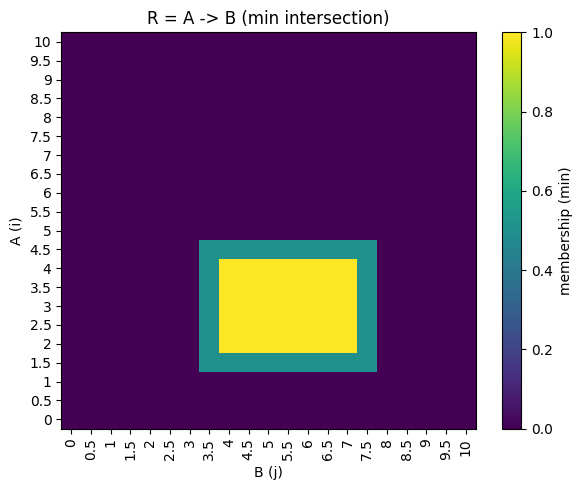

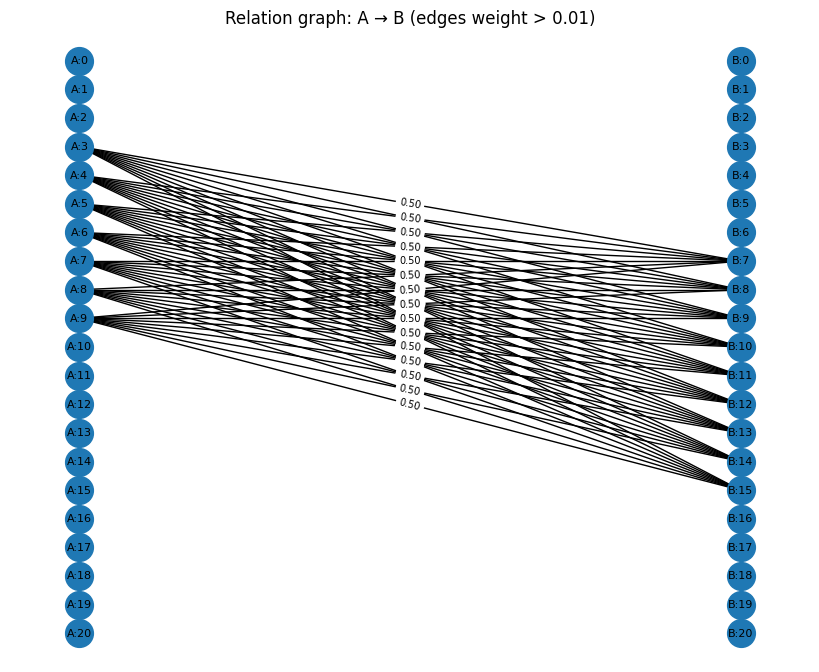

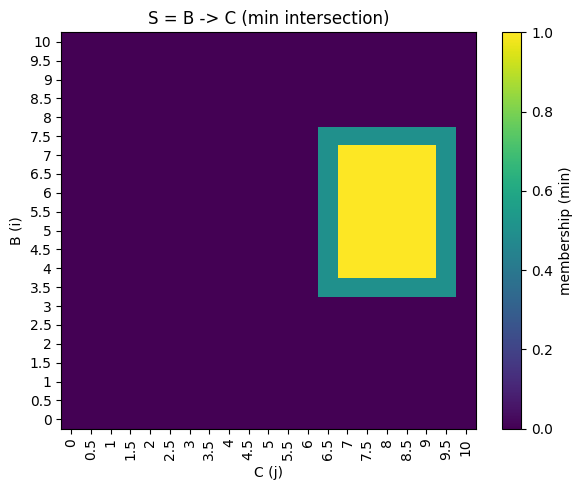

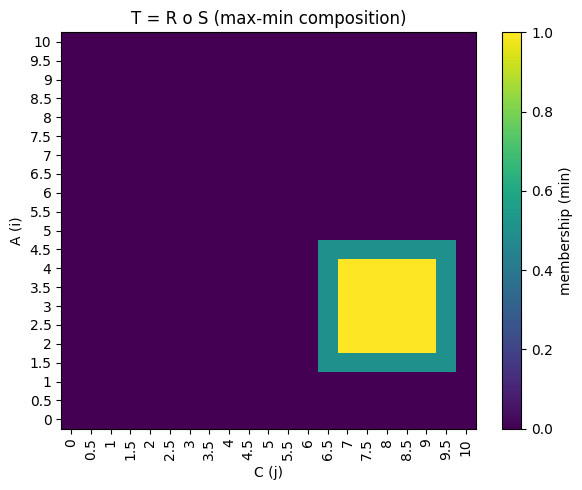

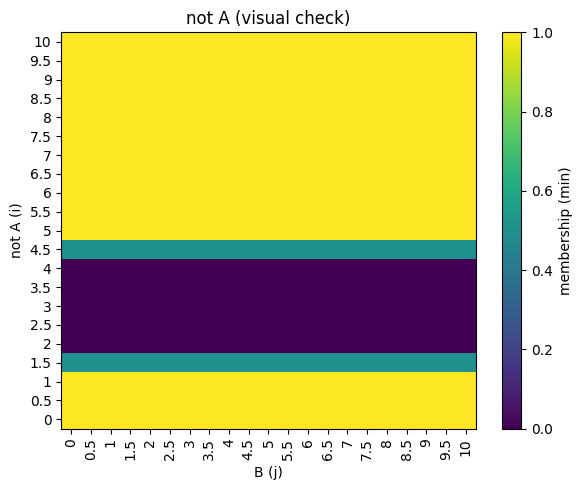

R_transpose shape (B x A): (21, 21)
Inferred B (from A' and R) mu: [0.  0.  0.  0.  0.  0.  0.  0.5 1.  1.  1.  1.  1.  1.  1.  0.5 0.  0.
 0.  0.  0. ]


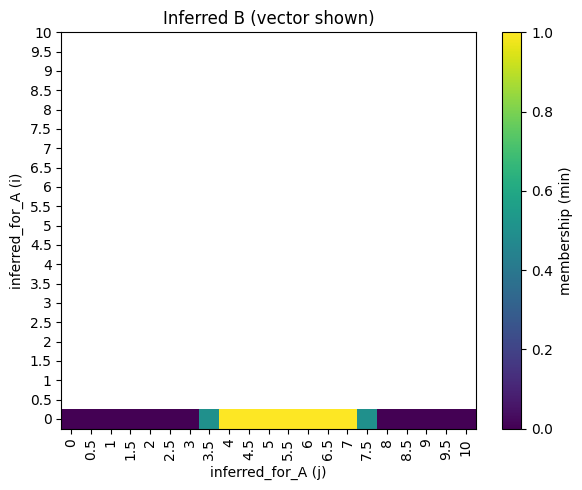

Mamdani aggregated mu (sample): [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  1.  1.  1.
 1.  0.5 0. ]
Defuzzified (centroid): 8.0


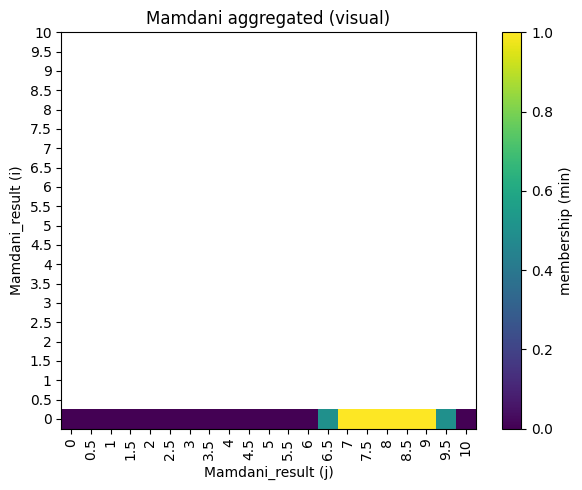

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from typing import Callable, List, Tuple

def trapezoid(x: np.ndarray, a: float, b: float, c: float, d: float) -> np.ndarray:
    y = np.zeros_like(x, dtype=float)
    idx = (x >= a) & (x < b)
    if b != a:
        y[idx] = (x[idx] - a) / (b - a)
    idx = (x >= b) & (x <= c)
    y[idx] = 1.0
    idx = (x > c) & (x <= d)
    if d != c:
        y[idx] = (d - x[idx]) / (d - c)
    return np.clip(y, 0.0, 1.0)

class FuzzySet:
    def __init__(self, name: str, universe: np.ndarray, mu: np.ndarray):
        assert len(universe) == len(mu)
        self.name = name
        self.universe = universe
        self.mu = mu.astype(float)

    @staticmethod
    def from_trapezoid(name: str, universe: np.ndarray, a: float, b: float, c: float, d: float):
        return FuzzySet(name, universe, trapezoid(universe, a, b, c, d))

    def complement(self):
        return FuzzySet(f"not {self.name}", self.universe, 1.0 - self.mu)

def build_relation_matrix(A: FuzzySet, B: FuzzySet) -> np.ndarray:
    muA = A.mu.reshape(-1, 1)  # (n,1)
    muB = B.mu.reshape(1, -1)  # (1,m)
    R = np.minimum(muA, muB)
    return R

def plot_matrix(R: np.ndarray, A: FuzzySet, B: FuzzySet, title: str = "Relation matrix"):
    plt.figure(figsize=(6,5))
    plt.imshow(R, origin='lower', aspect='auto', vmin=0, vmax=1)
    plt.colorbar(label='membership (min)')
    plt.xlabel(f"{B.name} (j)")
    plt.ylabel(f"{A.name} (i)")
    plt.title(title)
    plt.xticks(ticks=np.arange(len(B.universe)), labels=[f"{v:.2g}" for v in B.universe], rotation=90)
    plt.yticks(ticks=np.arange(len(A.universe)), labels=[f"{v:.2g}" for v in A.universe])
    plt.tight_layout()
    plt.show()

def plot_relation_graph(R: np.ndarray, A: FuzzySet, B: FuzzySet, threshold: float = 0.0):
    """
    Рисуем двудольный граф: вершины Ai и Bj, ребро весом R[i,j] (опционально фильтруем по threshold).
    Вес отображается числом возле ребра.
    """
    G = nx.Graph()
    left_nodes = [f"{A.name}:{i}" for i in range(len(A.universe))]
    right_nodes = [f"{B.name}:{j}" for j in range(len(B.universe))]
    G.add_nodes_from(left_nodes, bipartite=0)
    G.add_nodes_from(right_nodes, bipartite=1)


    for i, u in enumerate(left_nodes):
        for j, v in enumerate(right_nodes):
            w = float(R[i, j])
            if w > threshold:
                G.add_edge(u, v, weight=w)

    pos = {}
    for idx, node in enumerate(left_nodes):
        pos[node] = (0, -idx)
    for idx, node in enumerate(right_nodes):
        pos[node] = (2, -idx)

    plt.figure(figsize=(8, max(4, len(A.universe)*0.3, len(B.universe)*0.3)))
    nx.draw(G, pos, with_labels=True, node_size=400, font_size=8)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
    plt.title(f"Relation graph: {A.name} → {B.name} (edges weight > {threshold})")
    plt.axis('off')
    plt.show()

# 5) Свёртка / композиция матриц (max-min)
#    (R ∘ S)[i,k] = max_j min( R[i,j], S[j,k] )
def max_min_composition(R: np.ndarray, S: np.ndarray) -> np.ndarray:
    # R: (n x m), S: (m x p) -> result (n x p)
    n, m1 = R.shape
    m2, p = S.shape
    assert m1 == m2, "Inner dimensions must match for composition"
    result = np.zeros((n, p), dtype=float)
    for i in range(n):
        for k in range(p):
            # по j берем min, затем max по j
            mins = np.minimum(R[i, :], S[:, k])
            result[i, k] = np.max(mins)
    return result

# 6) Modus Ponens (fuzzy): вывести B' по A' и R (A×B)
#    B' = A' ∘ R  (max-min композиция), когда A' — вектор принадлежностей по A.universe
def fuzzy_modus_ponens(A_prime: FuzzySet, R: np.ndarray, B_universe: np.ndarray) -> FuzzySet:
    # A_prime.mu: (n,), R: (n x m) -> result mu: (m,)
    n, m = R.shape
    assert len(A_prime.mu) == n
    # композиция: для каждого j: sup_i min(A'(i), R[i,j])
    result = np.zeros(m, dtype=float)
    for j in range(m):
        mins = np.minimum(A_prime.mu, R[:, j])
        result[j] = np.max(mins)
    return FuzzySet(f"inferred_for_{A_prime.name}", B_universe, result)

def mamdani_inference(A_prime: FuzzySet, rules_R_list: List[Tuple[np.ndarray, FuzzySet]]) -> FuzzySet:
    """
    rules_R_list: список пар (R_matrix, consequent FuzzySet B)
    R_matrix: матрица A_universe x B_universe
    Для каждого правила: cut consequent by degree = A' ∘ R  (получаем mu_B_rule)
    Затем агрегируем (max) по правилам.
    """
    # предполагаем, что все B.universe идентичны
    B_universe = rules_R_list[0][1].universe
    aggregated = np.zeros_like(B_universe, dtype=float)
    for R, B in rules_R_list:
        inferred_B = fuzzy_modus_ponens(A_prime, R, B_universe)
        aggregated = np.maximum(aggregated, inferred_B.mu)
    return FuzzySet("Mamdani_result", B_universe, aggregated)

def defuzz_centroid(fset: FuzzySet) -> float:
    mu = fset.mu
    x = fset.universe
    if np.sum(mu) == 0:
        return float(np.nan)
    return float(np.sum(x * mu) / np.sum(mu))


def demo():
    # задаём дискретный универсум (0..10 с шагом 0.5)
    x = np.arange(0.0, 10.1, 0.5)

    # два нечетких множества A и B (трапеции)
    A = FuzzySet.from_trapezoid("A", x, a=1, b=2, c=4, d=5)
    B = FuzzySet.from_trapezoid("B", x, a=3, b=4, c=7, d=8)
    C = FuzzySet.from_trapezoid("C", x, a=6, b=7, c=9, d=10)

    # relation R = A -> B
    R = build_relation_matrix(A, B)
    print("R (A->B) shape:", R.shape)
    plot_matrix(R, A, B, title="R = A -> B (min intersection)")
    plot_relation_graph(R, A, B, threshold=0.01)

    # relation S = B -> C
    S = build_relation_matrix(B, C)
    plot_matrix(S, B, C, title="S = B -> C (min intersection)")

    # композиция T = R o S  (A -> C)
    T = max_min_composition(R, S)
    plot_matrix(T, A, C, title="T = R o S (max-min composition)")

    # дополнение A
    notA = A.complement()
    plot_matrix(np.tile(notA.mu.reshape(-1,1), (1,len(B.universe))), notA, B, title="not A (visual check)")

    # транспонирование правила (смена направления)
    R_transpose = R.T  # теперь размерность B x A
    print("R_transpose shape (B x A):", R_transpose.shape)

    # Modus Ponens: пусть у нас наблюдаем A' (частично A)
    # Например, A' = A (или можно задать другое)
    A_prime = A  # простая демонстрация
    inferred_B = fuzzy_modus_ponens(A_prime, R, B.universe)
    print("Inferred B (from A' and R) mu:", inferred_B.mu)
    plot_matrix(np.tile(inferred_B.mu.reshape(1,-1), (1,1)), inferred_B, inferred_B, title="Inferred B (vector shown)")

    # Mamdani: объединяем несколько правил (R: A->B и R2: A->C переходим к единой вселенной B (здесь делаем упрощенно))
    # Для демонстрации используем правила (A->B) и (A->C) с согласованными universes -> возьмем C.universe как целевой
    # приводим размеры: R (n x m1), but need R' (n x p) where p = len(C.universe). Для демонстрации
    # пересэмплируем R в размер (n x p) простым способом — снова берем min с B и C по общему x — упрощение
    # Лучше: строить правила сразу для одинаковых вселенных следствия. Здесь мы покажем Mamdani на (A->C) (матрица T).
    mam_result = mamdani_inference(A_prime, [(T, C)])
    print("Mamdani aggregated mu (sample):", mam_result.mu)
    centroid = defuzz_centroid(mam_result)
    print("Defuzzified (centroid):", centroid)
    plot_matrix(np.tile(mam_result.mu.reshape(1,-1), (1,1)), mam_result, mam_result, title="Mamdani aggregated (visual)")

if __name__ == "__main__":
    demo()

In [ ]:
import os
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
import random
import matplotlib.pyplot as plt

class DiceDatasetGenerator:
    def __init__(self, image_size=128):
        self.image_size = image_size
        self.dice_config = {
            1: [(0.5, 0.5)],
            2: [(0.25, 0.25), (0.75, 0.75)],
            3: [(0.25, 0.25), (0.5, 0.5), (0.75, 0.75)],
            4: [(0.25, 0.25), (0.25, 0.75), (0.75, 0.25), (0.75, 0.75)],
            5: [(0.25, 0.25), (0.25, 0.75), (0.5, 0.5), (0.75, 0.25), (0.75, 0.75)],
            6: [(0.25, 0.25), (0.25, 0.5), (0.25, 0.75),
                (0.75, 0.25), (0.75, 0.5), (0.75, 0.75)]
        }

    def create_dice_face(self, number):
        img = np.ones((self.image_size, self.image_size, 3), dtype=np.uint8) * 255

        face_color = (255, 255, 255)
        img[:, :] = face_color

        dot_color = (0, 0, 0)

        dot_radius = 10

        for x_rel, y_rel in self.dice_config[number]:
            x = int(x_rel * self.image_size)
            y = int(y_rel * self.image_size)

            cv2.circle(img, (x, y), dot_radius, dot_color, -1)
            cv2.circle(img, (x-2, y-2), dot_radius//3, (255, 255, 255), -1)

        border_color = (100, 100, 100)
        border_thickness = 1
        cv2.rectangle(img, (2, 2), (self.image_size-3, self.image_size-3),
                     border_color, border_thickness)

        return img

    def generate_dataset(self, samples_per_class=6, output_dir='dice_dataset'):
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        for number in range(1, 7):
            class_dir = os.path.join(output_dir, str(number))
            if not os.path.exists(class_dir):
                os.makedirs(class_dir)

            print(f"Генерация изображений для числа {number}...")
            for i in range(samples_per_class):
                img = self.create_dice_face(number)
                img_path = os.path.join(class_dir, f'dice_{number}_{i:04d}.png')
                cv2.imwrite(img_path, img)

        print(f"Датасет успешно создан в директории {output_dir}")

generator = DiceDatasetGenerator()
generator.generate_dataset(samples_per_class=800, output_dir='dice_dataset')

Генерация изображений для числа 1...
Генерация изображений для числа 2...
Генерация изображений для числа 3...
Генерация изображений для числа 4...
Генерация изображений для числа 5...
Генерация изображений для числа 6...
Датасет успешно создан в директории dice_dataset


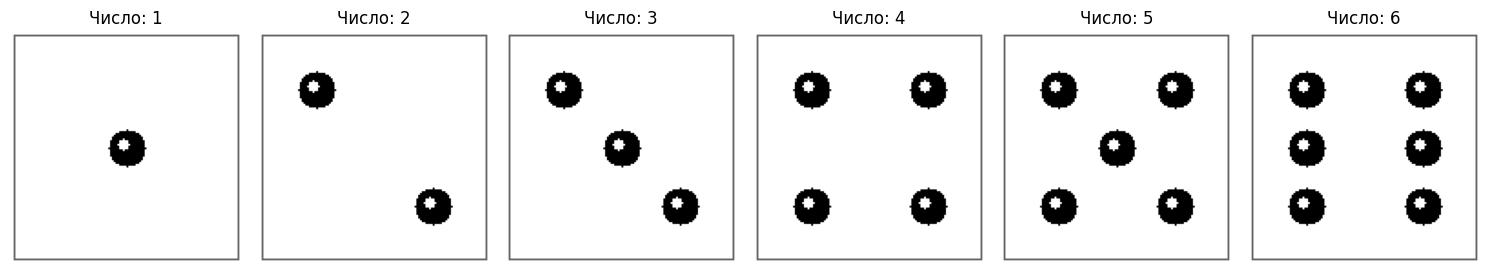

In [ ]:
def visualize_samples(dataset_path='dice_dataset', num_samples=6):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for number in range(1, num_samples + 1):
        class_dir = os.path.join(dataset_path, str(number))
        images = os.listdir(class_dir)
        if images:
            img_path = os.path.join(class_dir, images[0])
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[number-1].imshow(img_rgb)
            axes[number-1].set_title(f'Число: {number}')
            axes[number-1].axis('off')

    plt.tight_layout()
    plt.show()

visualize_samples()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.9065 - loss: 0.5189 - val_accuracy: 0.1667 - val_loss: 63.6309 - learning_rate: 0.0010
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9957 - loss: 0.0488 - val_accuracy: 0.1667 - val_loss: 124.3222 - learning_rate: 0.0010
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9999 - loss: 3.4430e-04 - val_accuracy: 0.3333 - val_loss: 62.6330 - learning_rate: 0.0010
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9978 - loss: 0.0216 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9924 - loss: 0.1469 - val_accuracy: 0.8333 - val_loss: 7.7107 - learning_rate: 0.0010
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9966 - loss: 0.1196 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 

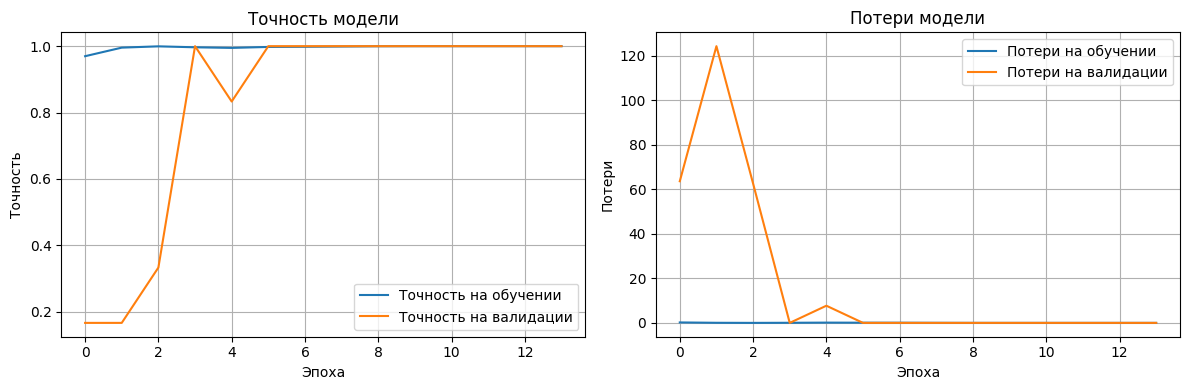

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,725,012 (59.99 MB)

 Trainable params: 5,241,350 (19.99 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 10,482,702 (39.99 MB)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

class DiceClassifier:
    def __init__(self, image_size=128):
        self.image_size = image_size
        self.model = None
        self.history = None

    def build_model(self):
        model = keras.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu',
                         input_shape=(self.image_size, self.image_size, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.BatchNormalization(),

            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.BatchNormalization(),

            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.BatchNormalization(),

            layers.Conv2D(256, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.BatchNormalization(),

            layers.Flatten(),
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(6, activation='softmax')
        ])

        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        self.model = model
        return model

    def load_and_preprocess_data(self, dataset_path='dice_dataset'):
        """Загружает и подготавливает данные"""
        images = []
        labels = []

        for number in range(1, 7):
            class_dir = os.path.join(dataset_path, str(number))
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)

                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (self.image_size, self.image_size))
                img = img.astype('float32') / 255.0

                images.append(img)
                labels.append(number - 1)

        X = np.array(images)
        y = keras.utils.to_categorical(labels, 6)

        return train_test_split(X, y, test_size=0.2, random_state=42, stratify=labels)

    def train(self, X_train, X_val, y_train, y_val, epochs=1):
        """Обучает модель"""
        callbacks = [
            keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=10,
                restore_best_weights=True
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=5,
                min_lr=1e-7
            )
        ]

        self.history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            verbose=1
        )

    def plot_training_history(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        ax1.plot(self.history.history['accuracy'], label='Точность на обучении')
        ax1.plot(self.history.history['val_accuracy'], label='Точность на валидации')
        ax1.set_title('Точность модели')
        ax1.set_xlabel('Эпоха')
        ax1.set_ylabel('Точность')
        ax1.legend()
        ax1.grid(True)

        ax2.plot(self.history.history['loss'], label='Потери на обучении')
        ax2.plot(self.history.history['val_loss'], label='Потери на валидации')
        ax2.set_title('Потери модели')
        ax2.set_xlabel('Эпоха')
        ax2.set_ylabel('Потери')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

path = '/dice_dataset/1/dice_1_0007.png'

classifier = DiceClassifier()
model = classifier.build_model()
classifier.train(*classifier.load_and_preprocess_data(), epochs=20)
classifier.plot_training_history()
model.summary()


Количество измерений: 3647
Минимум: 0.00°C, максимум: 26.30°C


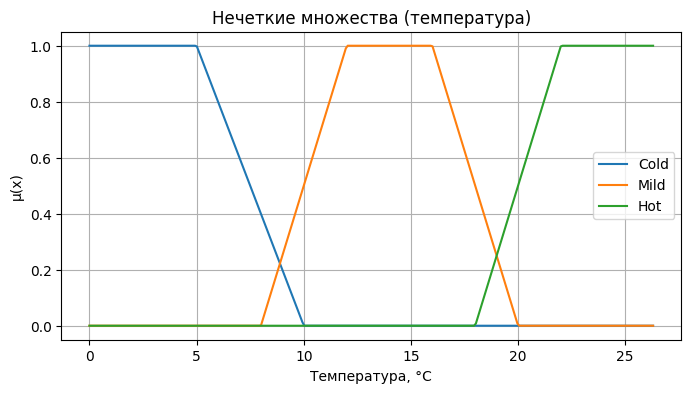


Фаззификация значения 14.5°C: {'Cold': 0.0, 'Mild': 1.0, 'Hot': 0.0}


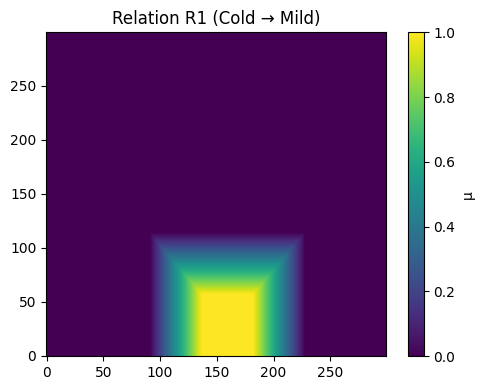

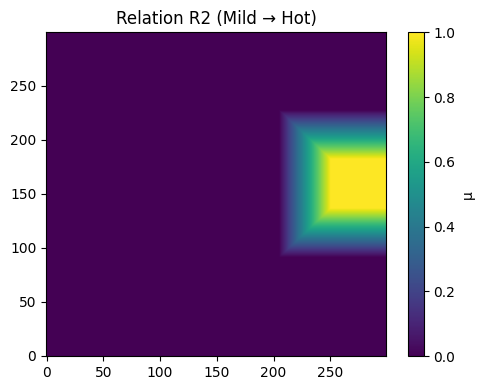


Свертка R1 и R2 (Sup-Min композиция):


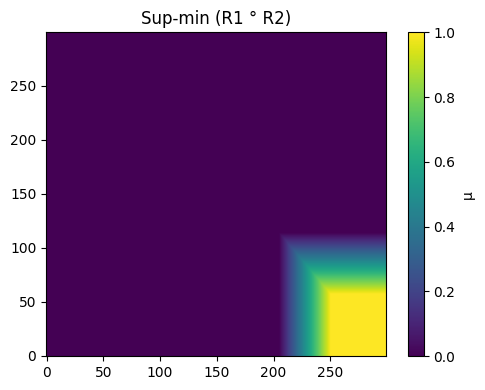

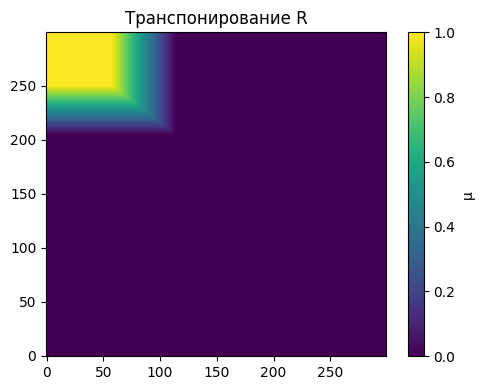

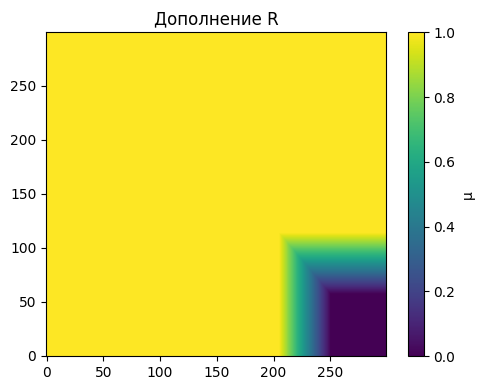


Результат Мамдани: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.05 0.07 0.09 0.11 0.13
 0.16 0.18 0.2  0.22 0.24 0.26 0.29 0.31 0.33 0.35 0.37 0.4  0.42 0.44
 0.46 0.48 0.51 0.53 0.55 0.57 0.59 0.62 0.64 0.66 0.68 0.7  0.73 0.75
 0.77 0.79 0.81 0.84 0.86 0.88 0.9  0.92 0.95 0.97 0.99 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   0.98 0.95 0.93 0.91 0.89 0.87 0.84 0.82 0.8  0.78 0.76 0.73 0.71
 0.69 

/tmp/ipython-input-1785689956.py:34: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  num = np.trapz(universe * aggregated_mu, universe)
/tmp/ipython-input-1785689956.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  den = np.trapz(aggregated_mu, universe)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Callable

# --------------------------- Трапецеидальная функция принадлежности ---------------------------

def trapezoidal(x: np.ndarray, a: float, b: float, c: float, d: float) -> np.ndarray:
    mu = np.zeros_like(x, dtype=float)
    idx = (x >= a) & (x < b)
    if b > a:
        mu[idx] = (x[idx] - a) / (b - a)
    idx = (x >= b) & (x <= c)
    mu[idx] = 1.0
    idx = (x > c) & (x <= d)
    if d > c:
        mu[idx] = (d - x[idx]) / (d - c)
    return np.clip(mu, 0.0, 1.0)

# --------------------------- Фаззификация ---------------------------

def fuzzify(value: float, terms: Dict[str, Callable[[np.ndarray], np.ndarray]], universe: np.ndarray) -> Dict[str, float]:
    results = {}
    for name, func in terms.items():
        mu_values = func(universe)
        degree = float(np.interp(value, universe, mu_values))
        results[name] = degree
    return results

# --------------------------- Дефаззификация ---------------------------

def defuzzify(universe: np.ndarray, aggregated_mu: np.ndarray, method: str = 'centroid') -> float:
    if method == 'centroid':
        num = np.trapz(universe * aggregated_mu, universe)
        den = np.trapz(aggregated_mu, universe)
        return num / den if den != 0 else 0.0
    else:
        raise ValueError(f"Unknown method: {method}")

# --------------------------- Построение продукционной матрицы ---------------------------

def build_relation_matrix(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    """Операция пересечения: R(x, y) = min(A(x), B(y))"""
    return np.minimum.outer(A, B)

# --------------------------- Свертка матриц (Sup-Min композиция) ---------------------------

def sup_min_composition(R1: np.ndarray, R2: np.ndarray) -> np.ndarray:
    m, n = R1.shape
    n2, p = R2.shape
    assert n == n2, "Матрицы несовместимы для композиции"
    result = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            result[i, j] = np.max(np.minimum(R1[i, :], R2[:, j]))
    return result

# --------------------------- Дополнение и транспонирование ---------------------------

def fuzzy_complement(A: np.ndarray) -> np.ndarray:
    return 1 - A

def fuzzy_transpose(R: np.ndarray) -> np.ndarray:
    return R.T

# --------------------------- Правило вывода Мамдани ---------------------------

def Mamdani(A: np.ndarray, R: np.ndarray) -> np.ndarray:
    m, n = R.shape
    assert len(A) == m
    result = np.zeros(n)
    for i in range(n):
        result[i] = np.max(np.minimum(A, R[:, i]))
    return result

# --------------------------- Визуализация ---------------------------

def plot_fuzzy_sets(universe: np.ndarray, terms: Dict[str, Callable[[np.ndarray], np.ndarray]]):
    plt.figure(figsize=(8, 4))
    for name, func in terms.items():
        plt.plot(universe, func(universe), label=name)
    plt.title('Нечеткие множества (температура)')
    plt.xlabel('Температура, °C')
    plt.ylabel('μ(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_matrix(R: np.ndarray, title: str = "Relation matrix"):
    plt.figure(figsize=(5, 4))
    plt.imshow(R, origin='lower', aspect='auto', vmin=0, vmax=1, cmap='viridis')
    plt.colorbar(label='μ')
    plt.title(title)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    df = pd.read_csv('daily-minimum-temperatures-in-me.csv')

    temps = sorted(list(df['Daily minimum temperatures in Melbourne, Australia, 1981-1990']))
    temps = temps[:-3]
    temps = np.array(sorted(list(map(float, temps))))

    print(f"Количество измерений: {len(temps)}")
    print(f"Минимум: {temps.min():.2f}°C, максимум: {temps.max():.2f}°C")

    x = np.linspace(temps.min(), temps.max(), 300)

    terms = {
        'Cold': lambda xx: trapezoidal(xx, temps.min(), temps.min(), 5, 10),
        'Mild': lambda xx: trapezoidal(xx, 8, 12, 16, 20),
        'Hot': lambda xx: trapezoidal(xx, 18, 22, temps.max(), temps.max())
    }

    plot_fuzzy_sets(x, terms)

    crisp_input = 14.5
    fuzzified = fuzzify(crisp_input, terms, x)
    print(f"\nФаззификация значения {crisp_input}°C: {fuzzified}")

    A = terms['Cold'](x)
    B = terms['Mild'](x)
    C = terms['Hot'](x)

    R1 = build_relation_matrix(A, B)
    R2 = build_relation_matrix(B, C)
    plot_matrix(R1, 'Relation R1 (Cold → Mild)')
    plot_matrix(R2, 'Relation R2 (Mild → Hot)')

    R_composed = sup_min_composition(R1, R2)
    print("\nСвертка R1 и R2 (Sup-Min композиция):")
    plot_matrix(R_composed, 'Sup-min (R1 ° R2)')

    R_T = fuzzy_transpose(R_composed)
    R_not = fuzzy_complement(R_composed)
    plot_matrix(R_T, 'Транспонирование R')
    plot_matrix(R_not, 'Дополнение R')

    mamdani_result = Mamdani(A, R1)
    print(f"\nРезультат Мамдани: {mamdani_result.round(2)}")

    aggregated = np.maximum.reduce([terms['Cold'](x), terms['Mild'](x)])
    crisp_out = defuzzify(x, aggregated)
    print(f"\nДефаззификация (центроид): {crisp_out:.2f}°C")


In [21]:
import torch

class DQNAgent:
  def __init__(self, n_state, n_actions, hidden_layers = 128):
    self.n_actions = n_actions
    #когнитивный агент
    self.dqn = torch.nn.Sequential(
        torch.nn.Linear(n_state, hidden_layers),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_layers, hidden_layers),
        torch.nn.ReLU(),
    )
    #средне квадратичная тк архитектура простая
    self.loss = torch.nn.MSELoss()
    self.optim = torch.optim.Adam(self.dqn.parameters())

  def make_action(self, state, eps = 0):
    with torch.no_grad():
      best_a = torch.argmax(self.dqn(torch.Tensor(state)))
      #эпсилон жадный алгоритм(выбор по вероятности)
      if torch.rand((1,)) > eps:
        return best_a.item()
      return torch.randint(0, self.n_actions, (1,))
  #обновление весов
  #гамма 1 тк следующая награда в приоритете
  #Q(s,a) ← r + γ * max Q(s',*)
  def update(self, state, next_state, action, reward, gamma=0.5):
    #вычисление весов
    q_v = self.dqn(torch.Tensor(state))
    q_v_n_s = self.dqn(torch.Tensor(next_state))
    q_v_predict = q_v.clone().tolist()
    q_v_predict[action] = reward + gamma*torch.max(q_v_n_s).item()
    self.optim.zero_grad()
    self.loss(q_v, torch.Tensor(q_v_predict)).backward()
    self.optim.step()

  def q_train(env, pol, n_episode):
    for episode in range(n_episode):
      state = env.reset()
      is_done = False
      while not is_done:
        env.render()
        action = pol.make_action(state)
        next_state, reward, is_done, _ = env.step(action)
        policy.update(state, next_state, action, reward)
        state = next_state

    env.close()

In [22]:
import numpy as np

class TradingEnv:
    def __init__(self, prices, window_size=10):
        self.prices = prices
        self.window = window_size
        self.reset()
        self.profit = 0

    def reset(self):
        self.balance = 0.0            # прибыль
        self.position = 0             # 1 — купили, -1 — продали, 0 — нет позиции
        self.current_step = self.window
        return self._get_state()

    def _get_state(self):
        # состояние = последние N цен
        return self.prices[self.current_step - self.window:self.current_step]

    def step(self, action):
        """
        action:
          0 — ждать
          1 — купить
          2 — продать
        """
        price = self.prices[self.current_step]

        reward = 0

        # BUY
        if action == 1:
            if self.position == 0:
                self.entry = price
                self.position = 1
            elif self.position == -1:
                # закрываем шорт
                reward = self.entry - price
                self.balance += reward
                self.position = 0

        # SELL (open short)
        elif action == 2:
            if self.position == 0:
                self.entry = price
                self.position = -1
            elif self.position == 1:
                # закрываем лонг
                reward = price - self.entry
                self.balance += reward
                self.position = 0

        # HOLD: reward = 0

        self.current_step += 1
        done = self.current_step >= len(self.prices)

        next_state = self._get_state() if not done else np.zeros(self.window)

        return next_state, reward, done, {"balance": self.balance}

    def render(self):
        print(f"Step: {self.current_step}, Balance: {self.balance}, Position: {self.position}")


In [24]:
prices = np.random.randn(500).cumsum() + 100
env = TradingEnv(prices, window_size=10)

agent = DQNAgent(n_state=10, n_actions=3)

for ep in range(100):
    state = env.reset()
    done = False

    while not done:
        action = agent.make_action(state, eps=1)
        next_state, reward, done, info = env.step(action)
        agent.update(state, next_state, action, reward)
        state = next_state

    print("Episode:", ep, "Balance:", info["balance"], "Action: ", action.item())

Episode: 0 Balance: 14.782080656468167 Action:  2
Episode: 1 Balance: 22.71827337745303 Action:  1
Episode: 2 Balance: -6.354722162336472 Action:  2
Episode: 3 Balance: -21.924798337376743 Action:  2
Episode: 4 Balance: -9.625247022675154 Action:  0
Episode: 5 Balance: -16.99928221714687 Action:  2
Episode: 6 Balance: 2.265788206504311 Action:  2
Episode: 7 Balance: 6.708065696651943 Action:  2
Episode: 8 Balance: -20.70542236190377 Action:  0
Episode: 9 Balance: -20.75772689736202 Action:  1
Episode: 10 Balance: -42.58664273253852 Action:  1
Episode: 11 Balance: -6.089826289494397 Action:  2
Episode: 12 Balance: -30.122258506774642 Action:  0
Episode: 13 Balance: -10.940710756869237 Action:  2
Episode: 14 Balance: 1.9703939928779164 Action:  2
Episode: 15 Balance: -17.15969900205353 Action:  2
Episode: 16 Balance: -34.56512658499966 Action:  2
Episode: 17 Balance: -7.4410396166059485 Action:  0
Episode: 18 Balance: 22.568910946469373 Action:  0
Episode: 19 Balance: -14.04041039472719 

In [25]:
import random
from collections import deque, namedtuple
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class TradingEnv:
    """
    Минимальная среда:
    - prices: 1D массив цен
    - window_size: длина состояния (история)
    - actions: 0=hold, 1=buy (open/close long), 2=sell (open/close short)
    Награда: прибыль при закрытии позиции. Пока упрощённо.
    """
    def __init__(self, prices, window_size=10):
        self.prices = np.asarray(prices, dtype=np.float32)
        self.window = window_size
        self.n_steps = len(self.prices)
        self.reset()

    def reset(self):
        self.balance = 0.0
        self.position = 0     # 1 = long, -1 = short, 0 = flat
        self.entry_price = 0.0
        self.step_idx = self.window
        return self._get_state()

    def _get_state(self):
        window = self.prices[self.step_idx - self.window:self.step_idx]
        diffs = np.diff(window) / (window[:-1] + 1e-8)
        state = np.concatenate([diffs, [self.position]])
        return state.astype(np.float32)

    def step(self, action):
        price = self.prices[self.step_idx]
        reward = 0.0

        # Выполнение действий (упрощённая логика)
        if action == 1:  # BUY
            if self.position == 0:
                self.position = 1
                self.entry_price = price
            elif self.position == -1:
                # закрываем шорт
                reward = self.entry_price - price
                self.balance += reward
                self.position = 0
        elif action == 2:  # SELL (open short or close long)
            if self.position == 0:
                self.position = -1
                self.entry_price = price
            elif self.position == 1:
                # закрываем лонг
                reward = price - self.entry_price
                self.balance += reward
                self.position = 0
        # action == 0 -> hold (ничего не делаем)

        self.step_idx += 1
        done = self.step_idx >= self.n_steps

        # Пусть next_state = zeros, если done (для удобства батчей)
        next_state = self._get_state() if not done else np.zeros(self.window - 1 + 1, dtype=np.float32)
        info = {"balance": self.balance}
        return next_state, float(reward), done, info

    def render(self):
        print(f"Step {self.step_idx}/{self.n_steps} | Balance {self.balance:.4f} | Position {self.position}")

Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'done'))

class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)

    def push(self, *args):
        self.buffer.append(Transition(*args))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        return Transition(*zip(*batch))

    def __len__(self):
        return len(self.buffer)

# ---------- Q-Network ----------
class QNetwork(nn.Module):
    def __init__(self, input_dim, n_actions, hidden=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, n_actions)   # важный выходной слой
        )

    def forward(self, x):
        return self.net(x)

# ---------- DQN Agent ----------
class DQNAgent:
    def __init__(self,
                 state_dim,
                 n_actions,
                 device='cuda',
                 hidden=128,
                 lr=1e-3,
                 gamma=0.99,
                 buffer_size=10000,
                 batch_size=64,
                 target_update=1000):
        self.device = torch.device(device)
        self.n_actions = n_actions
        self.gamma = gamma
        self.batch_size = batch_size
        self.target_update = target_update

        self.policy_net = QNetwork(state_dim, n_actions, hidden).to(self.device)
        self.target_net = QNetwork(state_dim, n_actions, hidden).to(self.device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()

        self.optim = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()
        self.replay = ReplayBuffer(capacity=buffer_size)

        self.learn_steps = 0

    def act(self, state, eps=0.0):
        # eps-greedy
        if random.random() < eps:
            return random.randrange(self.n_actions)
        state_v = torch.tensor(state, dtype=torch.float32, device=self.device).unsqueeze(0)
        with torch.no_grad():
            qvals = self.policy_net(state_v)
        return int(qvals.argmax(dim=1).item())

    def push(self, state, action, reward, next_state, done):
        self.replay.push(state, action, reward, next_state, done)

    def update(self):
        if len(self.replay) < self.batch_size:
            return None

        batch = self.replay.sample(self.batch_size)
        states = torch.tensor(np.stack(batch.state), dtype=torch.float32, device=self.device)
        actions = torch.tensor(batch.action, dtype=torch.int64, device=self.device).unsqueeze(1)
        rewards = torch.tensor(batch.reward, dtype=torch.float32, device=self.device).unsqueeze(1)
        next_states = torch.tensor(np.stack(batch.next_state), dtype=torch.float32, device=self.device)
        dones = torch.tensor(batch.done, dtype=torch.float32, device=self.device).unsqueeze(1)

        #текущие Q для множ действ а
        q_values = self.policy_net(states).gather(1, actions)

        #следующие Q
        with torch.no_grad():
            next_q = self.target_net(next_states).max(dim=1, keepdim=True)[0]
            target_q = rewards + (1.0 - dones) * (self.gamma * next_q)

        loss = self.loss_fn(q_values, target_q)

        self.optim.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.policy_net.parameters(), 1.0)
        self.optim.step()

        self.learn_steps += 1
        if self.learn_steps % self.target_update == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())
        return loss.item()

def train_agent(env, agent,
                n_episodes=200,
                max_steps_per_episode=1000,
                eps_start=1.0, eps_end=0.05, eps_decay=0.995):
    eps = eps_start
    history = []
    for ep in range(n_episodes):
        state = env.reset()
        total_reward = 0.0
        done = False
        steps = 0

        while not done and steps < max_steps_per_episode:
            action = agent.act(state, eps)
            next_state, reward, done, info = env.step(action)
            agent.push(state, action, reward, next_state, float(done))
            loss = agent.update()
            state = next_state
            total_reward += reward
            steps += 1

        eps = max(eps_end, eps * eps_decay)
        history.append((total_reward, info.get('balance', 0.0), action))
        if (ep + 1) % 10 == 0 or ep == 0:
            print(f"Episode: {ep:3d} | TotalReward: {total_reward:+.4f} | Balance: {info['balance']:+.4f} | Eps: {eps:.3f}")

    return history

if __name__ == "__main__":
    np.random.seed(42)
    steps = 2000
    prices = 100 + np.cumsum(np.random.randn(steps) * 0.5)  # случайный блуждающий процесс

    window = 10
    env = TradingEnv(prices, window_size=window)
    state_dim = (window - 1) + 1

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    agent = DQNAgent(state_dim, n_actions=3, device=device,
                     hidden=128, lr=1e-3, gamma=0.99,
                     buffer_size=20000, batch_size=64, target_update=500)

    history = train_agent(env, agent, n_episodes=200, max_steps_per_episode=1000,
                          eps_start=1.0, eps_end=0.05, eps_decay=0.995)

    # Печать итогов
    for i, (tot, bal, act) in enumerate(history[-10:], start=len(history)-10):
        print(f"Episode: {i:3d} Balance: {bal:.6f} LastAction: {act}")
    print("Итоговый баланс: ", tot)

Episode:   0 | TotalReward: -15.0814 | Balance: -15.0814 | Eps: 0.995
Episode:   9 | TotalReward: -20.2822 | Balance: -20.2822 | Eps: 0.951
Episode:  19 | TotalReward: -0.4407 | Balance: -0.4407 | Eps: 0.905
Episode:  29 | TotalReward: +3.6773 | Balance: +3.6773 | Eps: 0.860
Episode:  39 | TotalReward: +27.9627 | Balance: +27.9627 | Eps: 0.818
Episode:  49 | TotalReward: -22.3686 | Balance: -22.3686 | Eps: 0.778
Episode:  59 | TotalReward: -8.4235 | Balance: -8.4235 | Eps: 0.740
Episode:  69 | TotalReward: +33.3891 | Balance: +33.3891 | Eps: 0.704
Episode:  79 | TotalReward: -2.1060 | Balance: -2.1060 | Eps: 0.670
Episode:  89 | TotalReward: +1.4202 | Balance: +1.4202 | Eps: 0.637
Episode:  99 | TotalReward: -2.7985 | Balance: -2.7985 | Eps: 0.606
Episode: 109 | TotalReward: +7.2719 | Balance: +7.2719 | Eps: 0.576
Episode: 119 | TotalReward: -7.3435 | Balance: -7.3435 | Eps: 0.548
Episode: 129 | TotalReward: +11.6154 | Balance: +11.6154 | Eps: 0.521
Episode: 139 | TotalReward: +7.2115 

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 3.9 MB/s eta 0:00:00


In [27]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


Точность (Accuracy): 85.87%
ROC-AUC: 85.48%

Детальный отчет:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



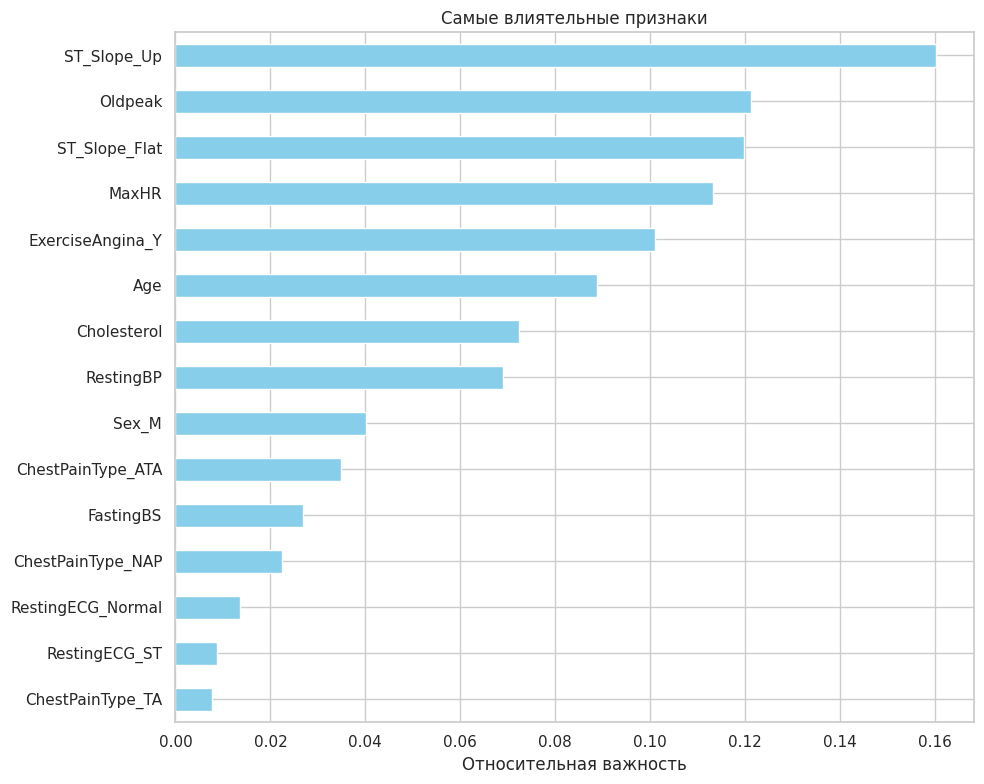

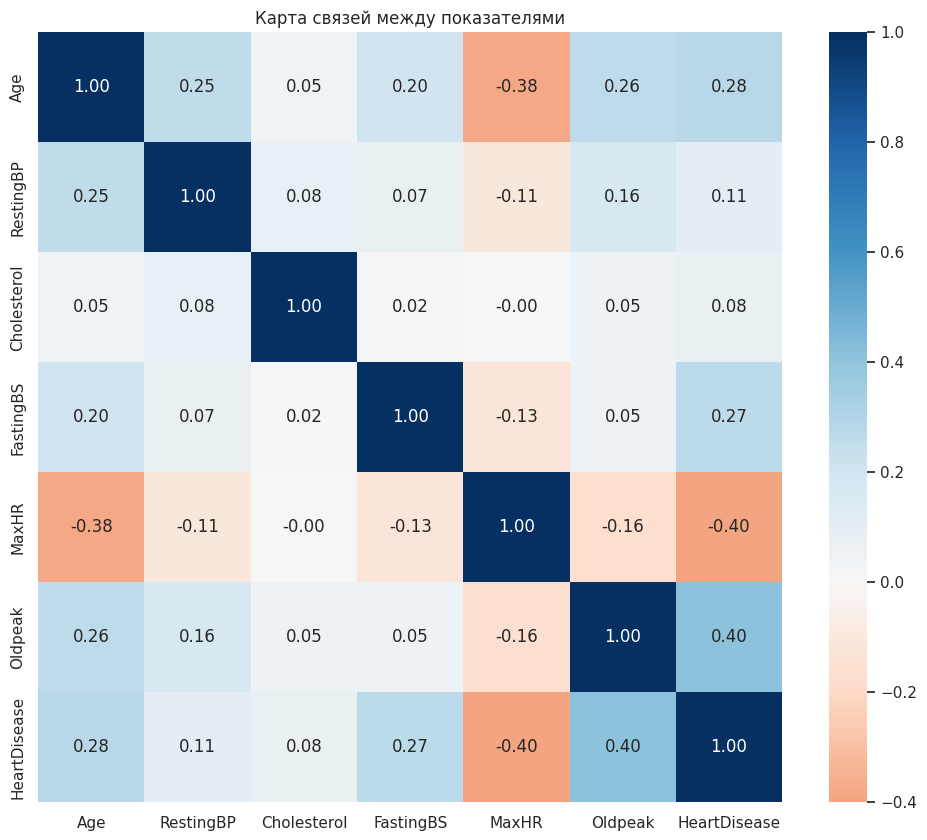

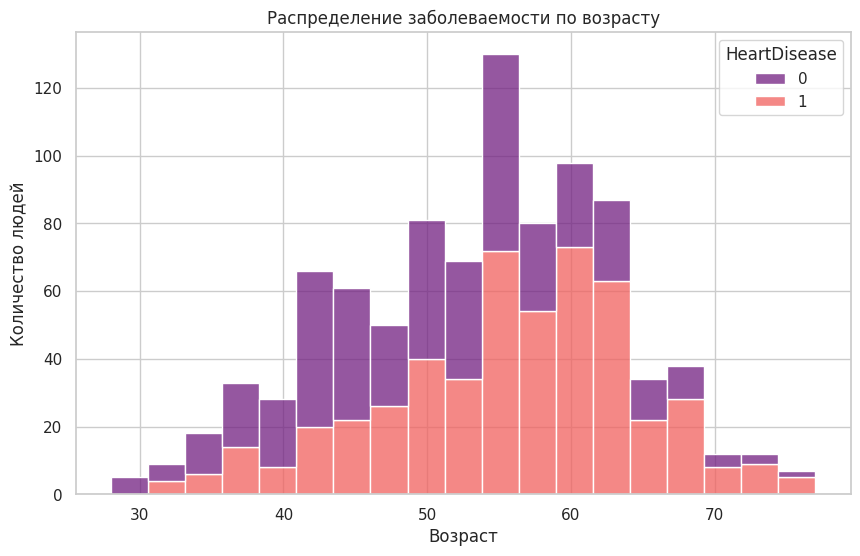

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart.csv')


df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
median_chol = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].fillna(median_chol)


cat_f = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=cat_f, drop_first=True)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Точность (Accuracy): {accuracy_score(y_test, y_pred):.2%}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.2%}")

print("\nДетальный отчет:")
print(classification_report(y_test, y_pred))

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

def show_imp(model, X):
    imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

    plt.figure(figsize=(10, 8))
    imp.plot(kind='barh', color='skyblue')
    plt.title('Самые влиятельные признаки')
    plt.xlabel('Относительная важность')
    plt.tight_layout()
    plt.show()

def show_corr(df):
    plt.figure(figsize=(12, 10))
    numeric_df = df.select_dtypes(include=[np.number])
    corr = numeric_df.corr()

    sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', center=0)
    plt.title('Карта связей между показателями')
    plt.show()

def show_age_distr(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', hue='HeartDisease', multiple="stack", palette='magma')
    plt.title('Распределение заболеваемости по возрасту')
    plt.xlabel('Возраст')
    plt.ylabel('Количество людей')
    plt.show()

show_imp(model, X)
show_corr(df)
show_age_distr(df)